In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn import metrics

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import RandomizedSearchCV
import random

import warnings
warnings.filterwarnings('ignore')

# FRAUD DETECTION UYGULAMASI

Bu uygulamada amaç, kullanıcıların nitelikli kaçak elektrik kullanım olasılığının tespit edilmesidir. Öncelikle Veri Keşfi yapılacaktır.

# VERİ KEŞFİ

Elimizdeki veri seti özgül olarak 17 kolondan oluşmaktadır. 
- **NÜMERİK KOLONLAR**
* NK_FLAG(Hedef Değişken)
- SOKAK_RISK_SKORU, SOB_RISK_SKORU, MAHALLE_RISK_SKORU
- TUKETIM_M1-TUKETIM_M24
- DEMAND_M1-DEMAND_M12
- SAYAC_MALZEME_ID
- SAYAC_YAPIM_YILI


- **KATEGORİK KOLONLAR**
- TESISAT_TIPI
- SAYAC_MARKA
- SAYAC_MODEL
- SAYAC_TIPI
- SAYAC_OLCUM_TURU
- SAYAC_FAZ_N


- **TARİH KOLONLARI**
- SAYAC_BASLANGIC_TARIHI
- SAYAC_BITIS_TARIHI
- SAYAC_TAKILMA_TARIHI

In [2]:
df = pd.read_excel("train_5.xlsx")
df.head()

,TUKETIM_M1,TUKETIM_M2,TUKETIM_M3,TUKETIM_M4,TUKETIM_M5,TUKETIM_M6,TUKETIM_M7,TUKETIM_M8,TUKETIM_M9,TUKETIM_M10,...,SAYAC_BASLANGIC_TARIHI,SAYAC_BITIS_TARIHI,SAYAC_MARKA,SAYAC_MODEL,SAYAC_MALZEME_ID,SAYAC_OLCUM_TURU,SAYAC_FAZ_N,SAYAC_TAKILMA_TARIHI,SAYAC_YAPIM_YILI,NK_FLAG
0,54.067286,260.483048,275.618048,273.467499,281.655063,352.713057,415.387382,506.970118,536.242000,497.518271,...,2016-10-18,9999-12-31 00:00:00,LUNA,LUN1,80000100.0,Aktif,Monofaze,2016-10-18,2012.0,0
1,125.413387,227.864889,253.651891,230.289027,241.382306,248.334700,217.821800,249.203886,246.356225,203.709124,...,2016-09-25,9999-12-31 00:00:00,ELEKTROMED,EC058MBW,80000730.0,Aktif,Monofaze,2016-09-25,2015.0,0
2,308.273107,386.164464,392.016065,238.200398,163.968966,162.782897,187.088937,212.920402,204.618086,181.509614,...,2016-10-11,9999-12-31 00:00:00,ELEKTROMED,EC15ATBW,80000730.0,Aktif,Trifaze,2016-10-11,2016.0,0
3,23.105143,49.197286,64.653696,73.807875,31.418710,31.834563,24.261624,27.079161,26.952110,32.072690,...,2016-05-24,9999-12-31 00:00:00,LUNA,LUN10,80000710.0,Aktif,Monofaze,2016-05-24,2016.0,0
4,36.016793,48.795995,50.209868,50.969201,49.746943,89.461700,328.368786,469.163521,432.848994,461.588897,...,2018-05-30,9999-12-31 00:00:00,LUNA,LUN10-B,80001000.0,Aktif,Monofaze,2018-05-30,2017.0,0


In [3]:
df.columns

Index(['TUKETIM_M1', 'TUKETIM_M2', 'TUKETIM_M3', 'TUKETIM_M4', 'TUKETIM_M5',
       'TUKETIM_M6', 'TUKETIM_M7', 'TUKETIM_M8', 'TUKETIM_M9', 'TUKETIM_M10',
       'TUKETIM_M11', 'TUKETIM_M12', 'TUKETIM_M13', 'TUKETIM_M14',
       'TUKETIM_M15', 'TUKETIM_M16', 'TUKETIM_M17', 'TUKETIM_M18',
       'TUKETIM_M19', 'TUKETIM_M20', 'TUKETIM_M21', 'TUKETIM_M22',
       'TUKETIM_M23', 'TUKETIM_M24', 'DEMAND_M1', 'DEMAND_M2', 'DEMAND_M3',
       'DEMAND_M4', 'DEMAND_M5', 'DEMAND_M6', 'DEMAND_M7', 'DEMAND_M8',
       'DEMAND_M9', 'DEMAND_M10', 'DEMAND_M11', 'DEMAND_M12', 'SOB_RISK_SKORU',
       'SOKAK_RISK_SKORU', 'MAHALLE_RISK_SKORU', 'TESISAT_TIPI',
       'SAYAC_BASLANGIC_TARIHI', 'SAYAC_BITIS_TARIHI', 'SAYAC_MARKA',
       'SAYAC_MODEL', 'SAYAC_MALZEME_ID', 'SAYAC_OLCUM_TURU', 'SAYAC_FAZ_N',
       'SAYAC_TAKILMA_TARIHI', 'SAYAC_YAPIM_YILI', 'NK_FLAG'],
      dtype='object')

In [4]:
num_cols = list(df.select_dtypes(include=['float64', 'int64']))
print(f"Nümerik kolonların toplam sayısı: {len(num_cols)}")

cat_cols = list(df.select_dtypes(include=['object']))
print(f"Nümerik kolonların toplam sayısı: {len(cat_cols)}")

date_cols = list(df.select_dtypes(include=['datetime']))
print(f"Nümerik kolonların toplam sayısı: {len(date_cols)}")
print(f"Toplam kolon sayısı: {len(num_cols+cat_cols+date_cols)}")

Nümerik kolonların toplam sayısı: 42
Nümerik kolonların toplam sayısı: 6
Nümerik kolonların toplam sayısı: 2
Toplam kolon sayısı: 50


Hedef değişkenin hakkındaki bilgilerin yazdırılması

VAKA SAYISI
--------------------------------------------
Toplam vaka sayısı: 15000
Fraud olmayan vaka sayısı: 13980
Fraud olan vaka sayısı 1020
Fraud vakaların oranı 7.3
--------------------------------------------


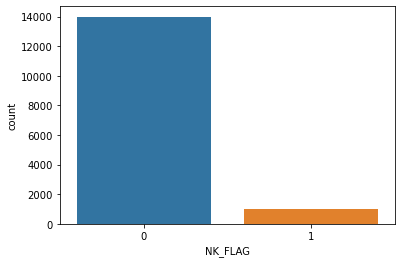

In [5]:
sns.countplot(df["NK_FLAG"])
cases = len(df)
nonfraud_count = len(df[df.NK_FLAG == 0])
fraud_count = len(df[df.NK_FLAG == 1])
fraud_percentage = round(fraud_count/nonfraud_count*100, 2)

print('VAKA SAYISI')
print('--------------------------------------------')
print('Toplam vaka sayısı: {}'.format(cases))
print('Fraud olmayan vaka sayısı: {}'.format(nonfraud_count))
print('Fraud olan vaka sayısı {}'.format(fraud_count))
print('Fraud vakaların oranı {}'.format(fraud_percentage))
print('--------------------------------------------')

In [6]:
df.describe()

,TUKETIM_M1,TUKETIM_M2,TUKETIM_M3,TUKETIM_M4,TUKETIM_M5,TUKETIM_M6,TUKETIM_M7,TUKETIM_M8,TUKETIM_M9,TUKETIM_M10,...,DEMAND_M9,DEMAND_M10,DEMAND_M11,DEMAND_M12,SOB_RISK_SKORU,SOKAK_RISK_SKORU,MAHALLE_RISK_SKORU,SAYAC_MALZEME_ID,SAYAC_YAPIM_YILI,NK_FLAG
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,...,13766.000000,12242.000000,13692.000000,11825.000000,15000.000000,15000.000000,15000.000000,1.495000e+04,14950.000000,15000.000000
mean,96.208479,205.978455,223.982149,217.158467,183.984799,184.405282,215.505007,248.644492,232.900504,205.188164,...,2.298214,2.584867,2.652326,4.903145,0.012733,0.015385,0.015423,8.000066e+07,2014.799130,0.068000
std,423.739447,806.797729,562.430605,1388.820828,1311.605920,1063.798858,1162.260886,1100.215516,1112.950045,1337.520990,...,1.916677,2.020813,6.961637,204.339999,0.026829,0.135404,0.062241,3.202995e+02,2.466089,0.251754
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000e+07,2007.000000,0.000000
25%,18.663720,67.464279,72.497774,71.253761,70.489054,72.638329,78.729780,81.960615,77.956021,74.530854,...,1.044000,1.480000,1.376000,1.592000,0.001531,0.000000,0.002672,8.000071e+07,2013.000000,0.000000
50%,57.967004,147.897623,156.901631,152.988106,136.929436,138.537125,151.135455,167.395119,156.945536,144.954876,...,2.160000,2.372000,2.304000,2.624000,0.005666,0.000000,0.006691,8.000073e+07,2015.000000,0.000000
75%,119.764778,244.215963,267.343281,251.375305,203.995790,201.954775,238.281348,288.195682,261.602692,224.807583,...,3.120000,3.384000,3.380000,4.096000,0.013746,0.010340,0.013659,8.000096e+07,2017.000000,0.000000
max,47318.985000,90851.355000,47803.770000,162381.240000,111955.470968,95467.680000,110822.519806,112852.579355,98479.082839,142768.472000,...,48.259000,43.868000,777.215000,22222.000000,1.127251,14.264706,4.208696,8.000103e+07,2020.000000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 50 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   TUKETIM_M1              15000 non-null  float64       
 1   TUKETIM_M2              15000 non-null  float64       
 2   TUKETIM_M3              15000 non-null  float64       
 3   TUKETIM_M4              15000 non-null  float64       
 4   TUKETIM_M5              15000 non-null  float64       
 5   TUKETIM_M6              15000 non-null  float64       
 6   TUKETIM_M7              15000 non-null  float64       
 7   TUKETIM_M8              15000 non-null  float64       
 8   TUKETIM_M9              15000 non-null  float64       
 9   TUKETIM_M10             15000 non-null  float64       
 10  TUKETIM_M11             15000 non-null  float64       
 11  TUKETIM_M12             15000 non-null  float64       
 12  TUKETIM_M13             14956 non-null  float6

Özetle elimizdeki veri seti 50 kolondan oluşmaktadır. Bunların 42 tanesi numerik, 6 tanesi kategorik ve 2 tanesi tarih kolonudur. Hedef değişken sayısı dengesiz olduğundan ***imbalanced*** bir veri setidir. Ayrıca veri setinin genel bilgileri yazdırıldığında birçok kolonda kayıp(null) değerler olduğu görülmektedir.

# KAYIP(NULL) DEĞERLERİN KEŞFİ, VERİLERİN GRUPLANDIRILMASI VE YENİ KOLONLAR OLUŞTURULMASI

Bütün null değerlerin oranları bulunarak toplam sayılarıyla birlikte çoktan aza doğru yazdırılmıştır.

In [8]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(33)

,Total,Percent
DEMAND_M12,3175,0.211667
DEMAND_M10,2758,0.183867
DEMAND_M8,2757,0.183800
DEMAND_M6,2582,0.172133
DEMAND_M2,2388,0.159200
DEMAND_M4,2369,0.157933
DEMAND_M11,1308,0.087200
DEMAND_M9,1234,0.082267
DEMAND_M7,1022,0.068133
DEMAND_M5,945,0.063000


Null değer sayılarının görselleştirilmesi

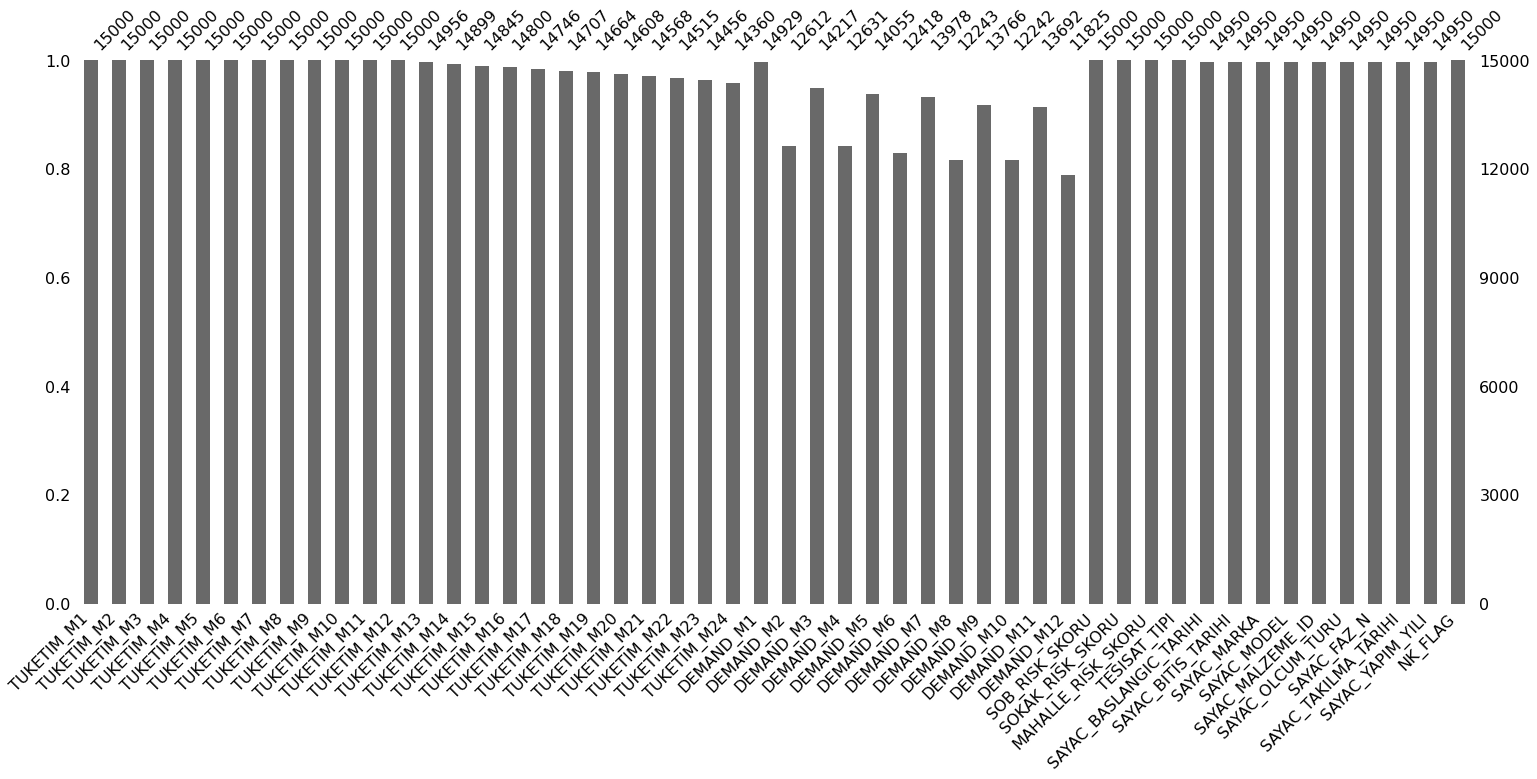

In [9]:
msno.bar(df)
plt.show()

Toplamda 33 kolonda null değerler bulunmaktadır. Bu değerlerin doldurulması konusunda, kategorik ve numerik olmalarına göre fark şekillerde yaklaşılacaktır. Kategorik verilerle başlayalım.

## Kategorik Veriler

Bu kısımda kategorik veriler öncelikle görselleştirilerek fraud oranları incelenmektedir. Daha sonra bu oranlara göre kolonlarda gruplamalar yapılarak veri seti daha anlamlı hale getirilmeye çalışılır. Görselleştimelere göre çıkan anlamlı sonuçlar:
- LUNA markasının "LUN10-B" modelinin fraud oranı bariz bir şekilde yüksektir. Bu modelde bir zafiyet olduğu anlamına gelebilir.
- LUNA ve ELEKTROMED markalarının sayıları diğer markalara nazaran daha yüksek olduğunda fraud sayıları da yüksek çıkmıştır fakat oransal olarak VIKO, KOHLER ve MAKEL markalarında daha fazla fraud vardır denilebilir.
- "SAYAC_YAPIM_YILI" kolonu numerik bir kolon olmasına rağmen kategorik gibi davranmaktadır. 2019 yılında yapılmış sayaçlarda bariz bir fraud oranı görülmektedir.

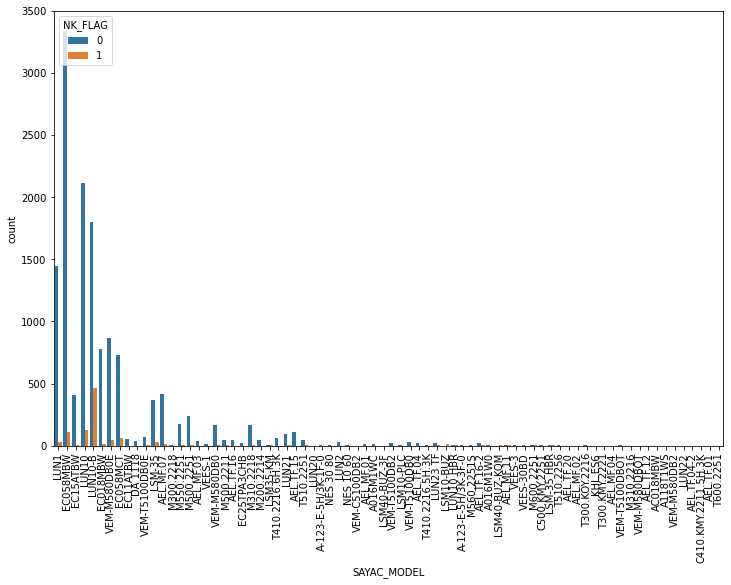

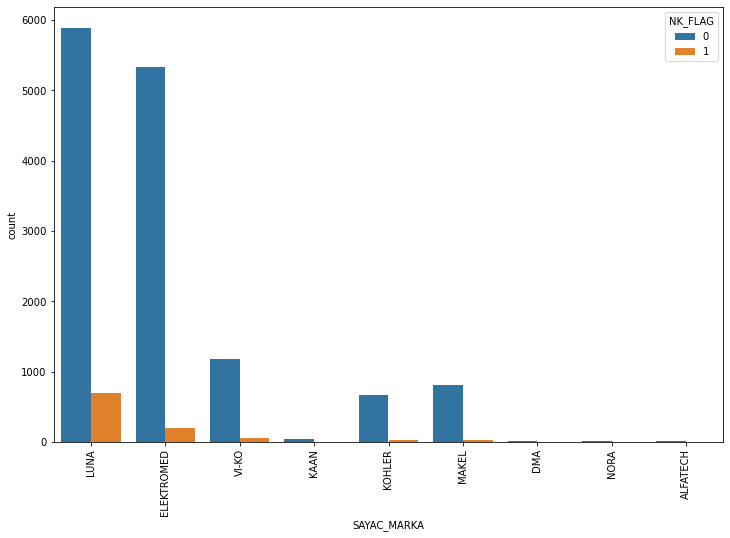

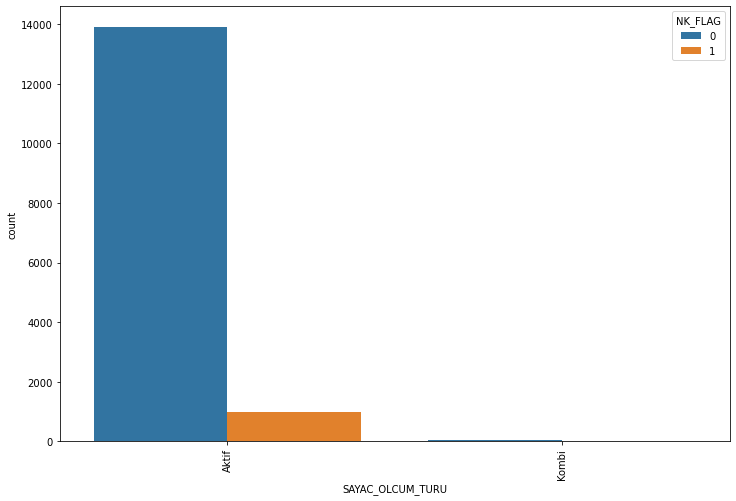

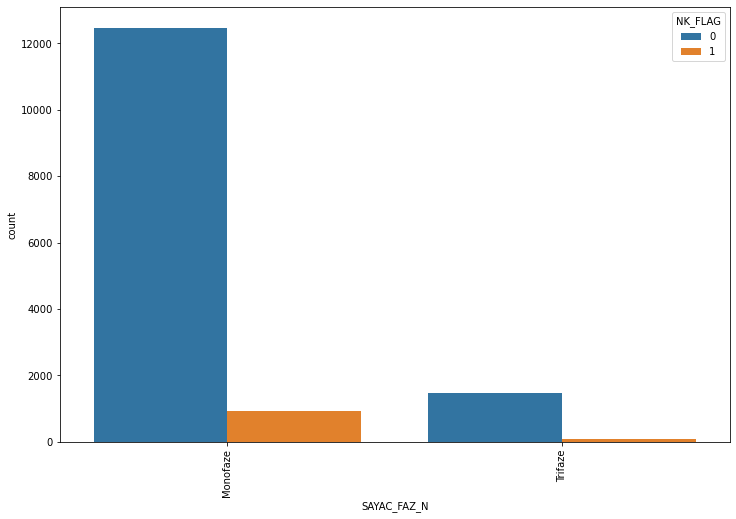

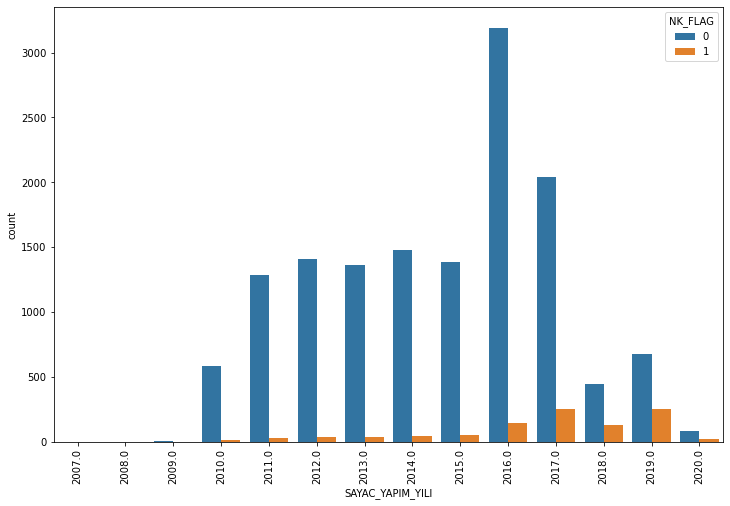

In [10]:
cat_cols_vis = ["SAYAC_MODEL", "SAYAC_MARKA", "SAYAC_OLCUM_TURU", "SAYAC_FAZ_N", "SAYAC_YAPIM_YILI"]
for i in cat_cols_vis:
    plt.figure(figsize=(12,8))
    sns.countplot(x=i,hue='NK_FLAG',data=df)
    plt.xticks(rotation=90)
    plt.show()

### Kategorik Verilerin Düzenlenmesi

Öncelikle 4 kategorik kolondaki null değerlere "UNDEFINED(Tanımsız)" değişkeni atanır. Bu yaklaşımın ilk sebebi, elimizdeki verileri silerek kaybetmek istemememizdir. Ayrıca bu veriler ulaşabileceğimiz veriler olmadığından herhangi başka verilerle doldurmak doğru bir yaklaşım olmazdı.

In [11]:
df["SAYAC_MODEL"].fillna("UNDEFINED", inplace=True)
df["SAYAC_MARKA"].fillna("UNDEFINED", inplace=True)
df["SAYAC_OLCUM_TURU"].fillna("UNDEFINED", inplace=True)
df["SAYAC_FAZ_N"].fillna("UNDEFINED", inplace=True)
df["SAYAC_YAPIM_YILI"].fillna(df["SAYAC_YAPIM_YILI"].mean(), inplace=True)

SAYAC_MARKA kolonu "Orta - Düşük Risk", "Yüksek Risk" ve "Çok Yüksek Risk" olarak 3 farklı grupta kategorize edilmiştir. Bu gruplamalar sonrası fraud oranları ve grafiği aşağıdaki gibidir.

In [12]:
def sayac_marka(i):
    if i in ('UNDEFINED'):
        return 'Çok Yüksek Risk'
    elif i in ('LUNA'):
        return 'Yüksek Risk'
    else:
        return "Orta - Düşük Risk"
df['SAYAC_MARKA'] = df['SAYAC_MARKA'].apply(sayac_marka)

In [13]:
df.groupby(["SAYAC_MARKA","NK_FLAG"])["NK_FLAG"].count()

SAYAC_MARKA        NK_FLAG
Orta - Düşük Risk  0          8056
                   1           306
Yüksek Risk        0          5893
                   1           695
Çok Yüksek Risk    0            31
                   1            19
Name: NK_FLAG, dtype: int64

<AxesSubplot:xlabel='SAYAC_MARKA', ylabel='NK_FLAG'>

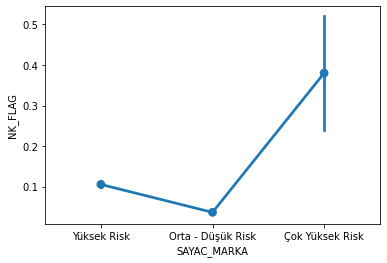

In [14]:
sns.pointplot(y=df.NK_FLAG, x=df.SAYAC_MARKA)

SAYAC_OLCUM_TURU ve SAYAC_FAZ_N kolonlarında değişiklik yapılmamıştır. Fraud sayıları ve grafikleri yazdırılmıştır.

In [15]:
df.groupby(["SAYAC_OLCUM_TURU","NK_FLAG"])["NK_FLAG"].count()

SAYAC_OLCUM_TURU  NK_FLAG
Aktif             0          13912
                  1            990
Kombi             0             37
                  1             11
UNDEFINED         0             31
                  1             19
Name: NK_FLAG, dtype: int64

<AxesSubplot:xlabel='SAYAC_OLCUM_TURU', ylabel='NK_FLAG'>

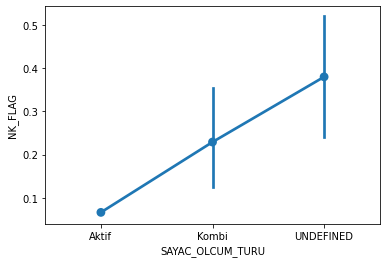

In [16]:
sns.pointplot(y=df.NK_FLAG, x=df.SAYAC_OLCUM_TURU)

In [17]:
df.groupby(["SAYAC_FAZ_N","NK_FLAG"])["NK_FLAG"].count()

SAYAC_FAZ_N  NK_FLAG
Monofaze     0          12472
             1            918
Trifaze      0           1477
             1             83
UNDEFINED    0             31
             1             19
Name: NK_FLAG, dtype: int64

<AxesSubplot:xlabel='SAYAC_FAZ_N', ylabel='NK_FLAG'>

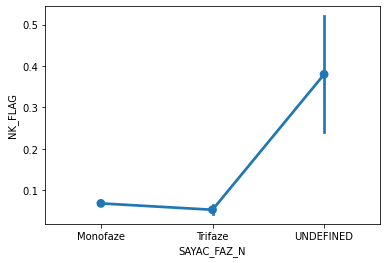

In [18]:
sns.pointplot(y=df.NK_FLAG, x=df.SAYAC_FAZ_N)

SAYAC_YAPIM_YILI kolonu "2015 Öncesi" ve "2015 ve sonrası" olarak yeniden gruplanmıştır.

In [19]:
def sayac_yapim(i):
    if i >= 2015:
        return "2015 ve sonrası"
    else:
        return '2015 Öncesi'
df['SAYAC_YAPIM_YILI'] = df['SAYAC_YAPIM_YILI'].apply(sayac_yapim)

<AxesSubplot:xlabel='SAYAC_YAPIM_YILI', ylabel='NK_FLAG'>

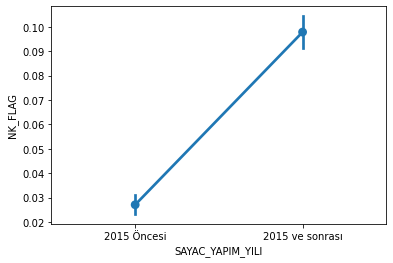

In [20]:
sns.pointplot(y=df.NK_FLAG, x=df.SAYAC_YAPIM_YILI)

Gruplama yapılmış "SAYAC_YAPIM_YILI" ve "SAYAC_MARKA" kolonlarının görselleştirilmesi:

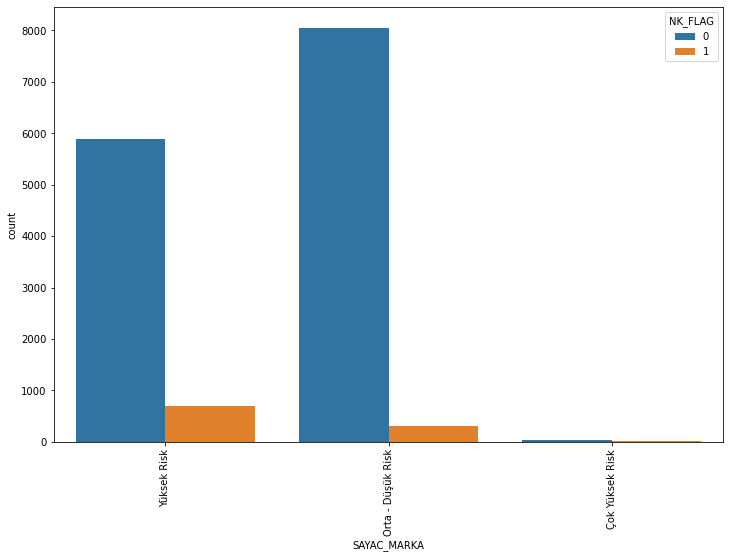

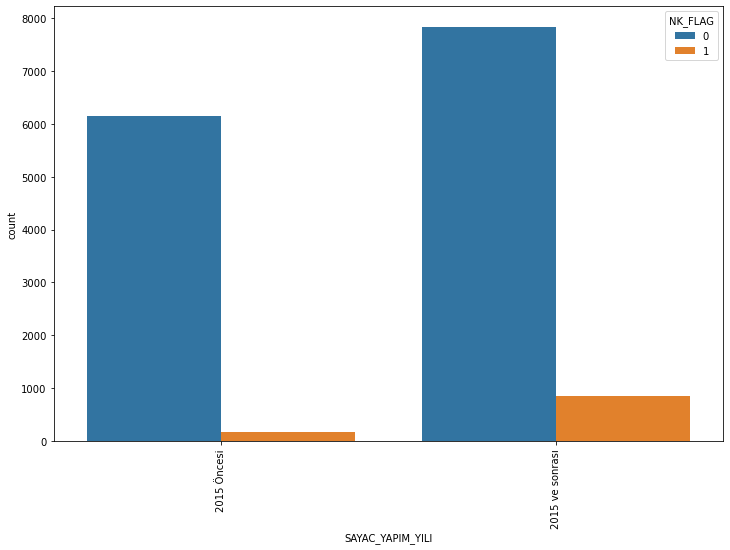

In [21]:
cat_cols_vis2 = ["SAYAC_MARKA", "SAYAC_YAPIM_YILI"]
for i in cat_cols_vis2:
    plt.figure(figsize=(12,8))
    sns.countplot(x=i,hue='NK_FLAG',data=df)
    plt.xticks(rotation=90)
    plt.show()

Çıkan sonuçlara göre:
- SAYAC_MARKA kolonu markanın kaçak kullanım zafiyetine göre risk gruplarına ayrılmıştır. Yüksek Risk grubu LUNA markasını içerir ve bu markanın zafiyetini bir kere daha göstermektedir.
- SAYAC_OLCUM_TURU ve SAYAC_FAZ_N kolonlarındaki gruplarda sayılar dengesiz dağıldığı için yorum yapılamamıştır.
- SAYAC_YAPIM_YILI 2015 yılı dönüm noktası alınarak kategorik bir kolona dönüştürülmüştür. 2015 yılı ve sonrası yıllarda fraud oranında bir artış gözlemlenmiştir.

## Nümerik Veriler

Nümerik kolonlar Risk Skorları, Tüketim ve Demand kolonlarından oluşmaktadır. Sırasıyla null değerleri kontrol edilecek, yeni kolonlar eklenecek veya kolonlarda yeni gruplamalar yapılacaktır.

### Risk Skorları

3 farklı risk skoru kolonu vardır. Birbirinden farklı skorlar bir anlam ifade etmediği için bu verilerin gruplandırılmasına karar verilmiştir. Gruplandırmalardan sonra bu 3 kolon kategorik hale gelecektir. Gruplamalar, kolonların minimum, maksimum, çeyreklik ve ortanca değerlerine göre yapılmıştır.

In [22]:
risk_score_columns = ["MAHALLE_RISK_SKORU", "SOKAK_RISK_SKORU", "SOB_RISK_SKORU"]
for i in risk_score_columns:
    print(df[i].describe())
    print("-"*30)

count    15000.000000
mean         0.015423
std          0.062241
min          0.000000
25%          0.002672
50%          0.006691
75%          0.013659
max          4.208696
Name: MAHALLE_RISK_SKORU, dtype: float64
------------------------------
count    15000.000000
mean         0.015385
std          0.135404
min          0.000000
25%          0.000000
50%          0.000000
75%          0.010340
max         14.264706
Name: SOKAK_RISK_SKORU, dtype: float64
------------------------------
count    15000.000000
mean         0.012733
std          0.026829
min          0.000000
25%          0.001531
50%          0.005666
75%          0.013746
max          1.127251
Name: SOB_RISK_SKORU, dtype: float64
------------------------------


In [23]:
bins = [df["MAHALLE_RISK_SKORU"].min(), df["MAHALLE_RISK_SKORU"].median(), df["MAHALLE_RISK_SKORU"].quantile(0.75), df["MAHALLE_RISK_SKORU"].max()]
bin_labels = [ "Düşük", 'Orta', 'Yüksek']
df['MAHALLE_RISK_SKORU_group'] = pd.cut(df['MAHALLE_RISK_SKORU'], bins = bins, labels=bin_labels, include_lowest= True)

<AxesSubplot:xlabel='NK_FLAG', ylabel='count'>

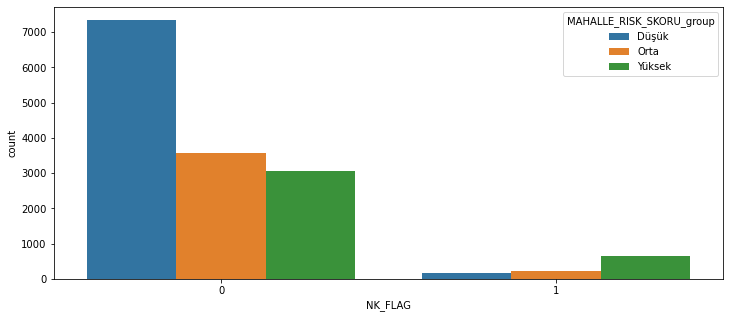

In [24]:
plt.figure(figsize=(12,5))
sns.countplot(x=df['NK_FLAG'],hue=df["MAHALLE_RISK_SKORU_group"],data=df)

<AxesSubplot:xlabel='MAHALLE_RISK_SKORU_group', ylabel='NK_FLAG'>

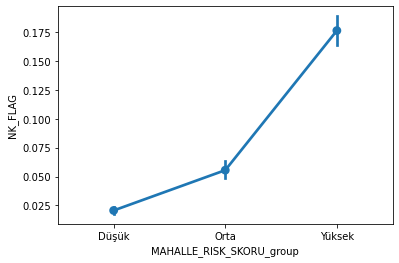

In [25]:
sns.pointplot(y=df.NK_FLAG, x=df.MAHALLE_RISK_SKORU_group)

In [26]:
bins = [df["SOKAK_RISK_SKORU"].min(), df["SOKAK_RISK_SKORU"].quantile(0.75), df["SOKAK_RISK_SKORU"].max()]
bin_labels = ["Düşük", 'Yüksek']
df['SOKAK_RISK_SKORU_group'] = pd.cut(df['SOKAK_RISK_SKORU'], bins = bins, labels=bin_labels, include_lowest= True)

<AxesSubplot:xlabel='NK_FLAG', ylabel='count'>

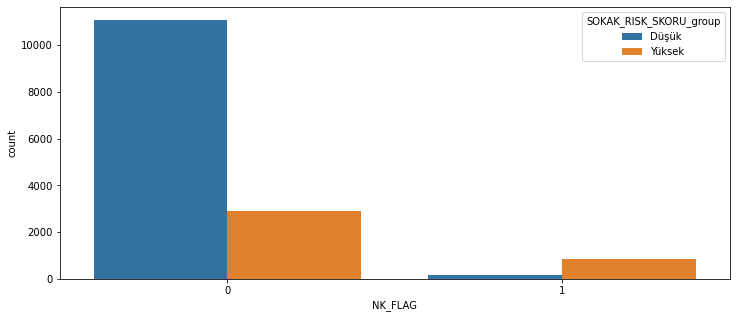

In [27]:
plt.figure(figsize=(12,5))
sns.countplot(x=df['NK_FLAG'],hue=df["SOKAK_RISK_SKORU_group"],data=df)

<AxesSubplot:xlabel='SOKAK_RISK_SKORU_group', ylabel='NK_FLAG'>

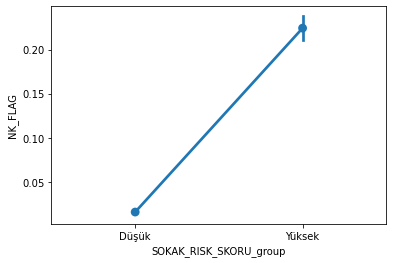

In [28]:
sns.pointplot(y=df.NK_FLAG, x=df.SOKAK_RISK_SKORU_group)

In [29]:
bins = [df["SOB_RISK_SKORU"].min(), df["SOB_RISK_SKORU"].quantile(0.25), df["SOB_RISK_SKORU"].median(), df["SOB_RISK_SKORU"].quantile(0.75), df["SOB_RISK_SKORU"].max()]
bin_labels = ["Çok Düşük", "Düşük", 'Orta', 'Yüksek']
df['SOB_RISK_SKORU_group'] = pd.cut(df['SOB_RISK_SKORU'], bins = bins, labels=bin_labels, include_lowest= True)

<AxesSubplot:xlabel='NK_FLAG', ylabel='count'>

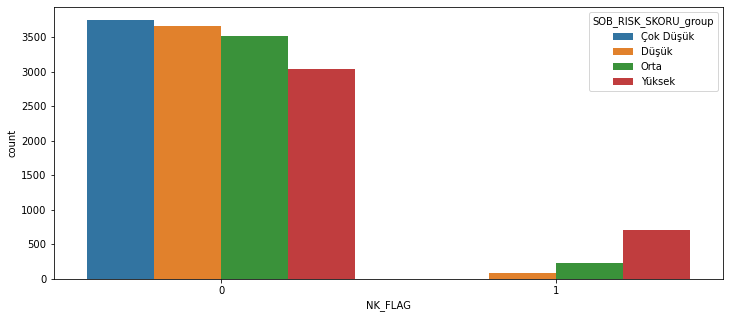

In [30]:
plt.figure(figsize=(12,5))
sns.countplot(x=df['NK_FLAG'],hue=df["SOB_RISK_SKORU_group"],data=df)

<AxesSubplot:xlabel='SOB_RISK_SKORU_group', ylabel='NK_FLAG'>

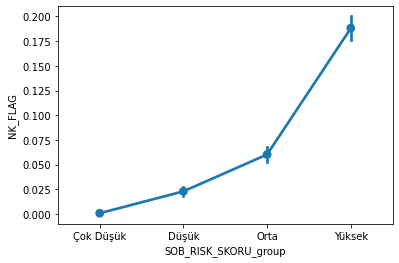

In [31]:
sns.pointplot(y=df.NK_FLAG, x=df.SOB_RISK_SKORU_group)

### Tüketim Verileri

Tüketim kolonları kullanıcıların aylık tükettiği elektrik değerlerini gösterir. Tüketim verileri 24 kolondan oluşmaktadır. Bu kolonları daha anlamlı kılmak adına 6 yeni kolon oluşturulmuştur.
- aylik_ort_tuketim: Kullanıcının ay bazında ortalama tüketimi
- max_tuketim: Kullanıcının maksimum tüketimi
- min_tuketim: Kullanıcının minimum tüketimi
- max_aylik_tuketim_dususu: Kullanıcının tüketim trendini anlamak adına 24 ay arasındaki en yüksek düşüş değeri
- max_yillik_tuketim_dususu: Tüketim kolonları, 1-12 ve 13-24 olarak 2 yıla bölündüğünde yıllık tüketim trendindeki düşüş değeri
- tuketim_null_sayisi: Tüketim kolonlarındaki null değerler

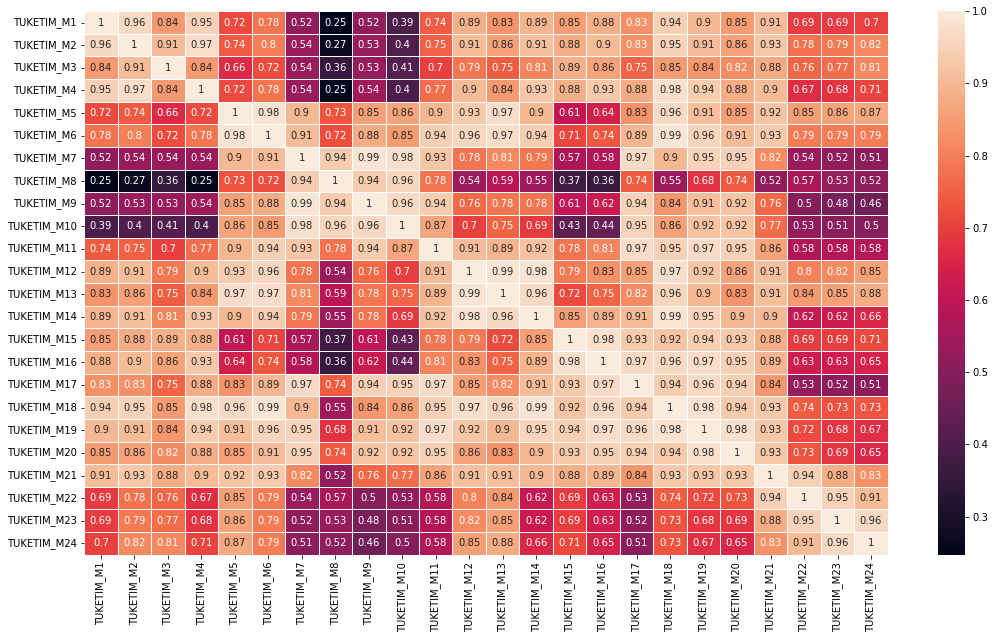

In [32]:
# df tuketim corr
plt.figure(figsize = (18, 10))
corr00 = df.corr()
sns.heatmap(data = corr00.iloc[0:24,0:24], annot = True, fmt = '.2g', linewidth = 1)
plt.show()

In [33]:
tuketim = (df.iloc[:,0:24])# tuketim degerlerini incelemek istersek
tuketim.head()

,TUKETIM_M1,TUKETIM_M2,TUKETIM_M3,TUKETIM_M4,TUKETIM_M5,TUKETIM_M6,TUKETIM_M7,TUKETIM_M8,TUKETIM_M9,TUKETIM_M10,...,TUKETIM_M15,TUKETIM_M16,TUKETIM_M17,TUKETIM_M18,TUKETIM_M19,TUKETIM_M20,TUKETIM_M21,TUKETIM_M22,TUKETIM_M23,TUKETIM_M24
0,54.067286,260.483048,275.618048,273.467499,281.655063,352.713057,415.387382,506.970118,536.242000,497.518271,...,300.337088,273.352000,266.875034,309.120407,326.750892,354.539943,318.070421,330.373589,345.701621,327.902260
1,125.413387,227.864889,253.651891,230.289027,241.382306,248.334700,217.821800,249.203886,246.356225,203.709124,...,290.624533,269.826633,215.697424,202.549150,230.007616,239.995010,226.454837,220.314917,218.741546,211.675245
2,308.273107,386.164464,392.016065,238.200398,163.968966,162.782897,187.088937,212.920402,204.618086,181.509614,...,193.950044,211.346271,238.872425,257.272032,294.784710,283.357450,226.819491,230.758659,206.737582,194.363068
3,23.105143,49.197286,64.653696,73.807875,31.418710,31.834563,24.261624,27.079161,26.952110,32.072690,...,108.295683,89.818174,37.593545,27.744979,26.212989,21.814145,22.798067,18.199133,18.319485,24.635136
4,36.016793,48.795995,50.209868,50.969201,49.746943,89.461700,328.368786,469.163521,432.848994,461.588897,...,532.276781,632.535600,646.499034,624.308966,575.821111,540.784103,594.512266,672.500911,46.106609,0.000000


Öncelikle oluşturulan kolonlarda işlem yapabilmek için kolonlar geçici olarak -1 değeriyle dolduruldu.

In [34]:
tuketim["aylik_ort_tuketim"] = np.nan
tuketim["max_tuketim"] = np.nan
tuketim["min_tuketim"] = np.nan
tuketim["max_aylik_tuketim_dususu"] = np.nan
tuketim["max_yillik_tuketim_dususu"] = np.nan
tuketim["tuketim_null_sayisi"] = np.nan

tuketim.fillna(-1, inplace=True) # veri setindeki tum null degerler gecici olarak -1 ile doldurulur
 
tuketim.head()

,TUKETIM_M1,TUKETIM_M2,TUKETIM_M3,TUKETIM_M4,TUKETIM_M5,TUKETIM_M6,TUKETIM_M7,TUKETIM_M8,TUKETIM_M9,TUKETIM_M10,...,TUKETIM_M21,TUKETIM_M22,TUKETIM_M23,TUKETIM_M24,aylik_ort_tuketim,max_tuketim,min_tuketim,max_aylik_tuketim_dususu,max_yillik_tuketim_dususu,tuketim_null_sayisi
0,54.067286,260.483048,275.618048,273.467499,281.655063,352.713057,415.387382,506.970118,536.242000,497.518271,...,318.070421,330.373589,345.701621,327.902260,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
1,125.413387,227.864889,253.651891,230.289027,241.382306,248.334700,217.821800,249.203886,246.356225,203.709124,...,226.454837,220.314917,218.741546,211.675245,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
2,308.273107,386.164464,392.016065,238.200398,163.968966,162.782897,187.088937,212.920402,204.618086,181.509614,...,226.819491,230.758659,206.737582,194.363068,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
3,23.105143,49.197286,64.653696,73.807875,31.418710,31.834563,24.261624,27.079161,26.952110,32.072690,...,22.798067,18.199133,18.319485,24.635136,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
4,36.016793,48.795995,50.209868,50.969201,49.746943,89.461700,328.368786,469.163521,432.848994,461.588897,...,594.512266,672.500911,46.106609,0.000000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


Tüketim kolonları veri setinden ayrıştırılarak işlem yapıldı.

In [35]:
tuketim1 = tuketim.iloc[:,:24]
tuketim1

,TUKETIM_M1,TUKETIM_M2,TUKETIM_M3,TUKETIM_M4,TUKETIM_M5,TUKETIM_M6,TUKETIM_M7,TUKETIM_M8,TUKETIM_M9,TUKETIM_M10,...,TUKETIM_M15,TUKETIM_M16,TUKETIM_M17,TUKETIM_M18,TUKETIM_M19,TUKETIM_M20,TUKETIM_M21,TUKETIM_M22,TUKETIM_M23,TUKETIM_M24
0,54.067286,260.483048,275.618048,273.467499,281.655063,352.713057,415.387382,506.970118,536.242000,497.518271,...,300.337088,273.352000,266.875034,309.120407,326.750892,354.539943,318.070421,330.373589,345.701621,327.902260
1,125.413387,227.864889,253.651891,230.289027,241.382306,248.334700,217.821800,249.203886,246.356225,203.709124,...,290.624533,269.826633,215.697424,202.549150,230.007616,239.995010,226.454837,220.314917,218.741546,211.675245
2,308.273107,386.164464,392.016065,238.200398,163.968966,162.782897,187.088937,212.920402,204.618086,181.509614,...,193.950044,211.346271,238.872425,257.272032,294.784710,283.357450,226.819491,230.758659,206.737582,194.363068
3,23.105143,49.197286,64.653696,73.807875,31.418710,31.834563,24.261624,27.079161,26.952110,32.072690,...,108.295683,89.818174,37.593545,27.744979,26.212989,21.814145,22.798067,18.199133,18.319485,24.635136
4,36.016793,48.795995,50.209868,50.969201,49.746943,89.461700,328.368786,469.163521,432.848994,461.588897,...,532.276781,632.535600,646.499034,624.308966,575.821111,540.784103,594.512266,672.500911,46.106609,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,48.759310,242.282118,305.187862,364.041376,335.741105,270.324229,261.348077,379.654869,421.752054,302.090882,...,610.505111,553.871929,385.612478,285.438594,345.162857,454.418433,368.258606,282.695716,260.547200,214.292877
14996,22.899931,221.434843,237.899774,237.992259,193.459992,230.845648,235.719764,335.931917,318.189711,201.489560,...,423.104067,317.261615,176.094785,174.265989,184.060482,247.209504,150.804522,201.667942,182.571226,194.766694
14997,35.103419,146.619759,172.015377,198.324000,180.250033,140.946512,143.669681,152.438057,151.259252,164.891766,...,176.394972,179.083778,176.198129,130.197871,76.019394,137.823139,140.514918,103.472215,110.678833,106.792000
14998,1.191094,6.105906,10.661600,6.234114,16.302857,16.211857,60.845087,114.472218,16.684195,0.895071,...,0.053010,0.051321,0.052439,9.199279,54.265455,93.855506,6.811857,18.144267,32.781626,0.040774


Burada "aylik_ort_tuketim", "max_tuketim" ve "min_tuketim" kolonlarının hesaplaması hesaplanır.

In [36]:
monthly_avg = 0.0
monthly_min = 999.00
monthly_max = 0.0
#consumption_diff = 0 
#temp = 0

for i in range(len(tuketim1)): # satirlar arasi dolasir
    for month in tuketim1: # sutunlar arasi dolasir
            
        if(tuketim[month].values[i] != -1): # nulları -1 ile doldurmustuk onlari ort hesabina katmiyoruz
            monthly_avg += tuketim[month].values[i]
            
        if(tuketim[month].values[i] > monthly_max): # kullanicinin aylık max tuketimi hesaplanir
            monthly_max = tuketim[month].values[i]
            
        if(tuketim[month].values[i] < monthly_min and tuketim[month].values[i] != -1): # kullanicinin aylık min tuketimi hesaplanir
            monthly_min = tuketim[month].values[i]
            
        
    monthly_avg = monthly_avg/len(tuketim1.columns)
    
    tuketim["aylik_ort_tuketim"].values[i] = monthly_avg
    tuketim["max_tuketim"].values[i] = monthly_max
    tuketim["min_tuketim"].values[i] = monthly_min
    #tuketim["max_aylik_tuketim_dususu"].values[i] = consumption_diff
    
    monthly_avg = 0.0
    monthly_min = 999.00
    monthly_max = 0.0
    #consumption_diff = 0 
    temp = 0

Tüketimdeki null degerler, tüketicinin aylık ortalama değerleri ile doldurulur ve "tuketim_null_sayisi" kolonu hesaplaması yapılır.

In [37]:
counter = 0

for i in range(len(tuketim1)): # satirlar arasi dolasir
    for month in tuketim1: # sutunlar arasi dolasir  
        if(tuketim[month].values[i] == -1): # nulları -1 ile doldurmustuk, deger null ise buraya girer
            tuketim[month].values[i] = tuketim["aylik_ort_tuketim"].values[i] # -1 olan deger, ort ile degistirildi
            counter += 1

            #print(counter)
    #print("*********")
        #if(counter > 3):
            #counter -= 3
    tuketim["tuketim_null_sayisi"].values[i] = counter   
            
    counter = 0
    
#tuketim.head(10)

Aylık değerler arasında bir düşüş varsa fark hesaplayan işlem sonucu "max_aylik_tuketim_dususu" kolonu hesaplanır.

In [38]:
consumption_diff = 0 
temp = 0

for i in range(len(tuketim1)): # satirlar arasi dolasir
    for month in tuketim1: # sutunlar arasi dolasir      
        if(temp < tuketim[month].values[i]): # düsüs varsa fark hesaplanir
            if(tuketim[month].values[i] != tuketim["aylik_ort_tuketim"].values[i] and temp != tuketim["aylik_ort_tuketim"].values[i] ): # degerler null degilse fark hesaplanir
                diff = abs(tuketim[month].values[i] - temp)    
                if(diff > consumption_diff and temp != 0):
                    consumption_diff = diff
            
        temp = tuketim[month].values[i]
        
    tuketim["max_aylik_tuketim_dususu"].values[i] = consumption_diff
    consumption_diff = 0 
    temp = 0
    
#tuketim.head(10)

Yıllık değerler arasında bir düşüş varsa fark hesaplayan işlem sonucu "max_yillik_tuketim_dususu" kolonu hesaplanır.

In [39]:
#tuketim icin aynı ayi yil bazinda karsilastirdim, farkini alinip yillik tuketim dususu hesaplanir

months = []
for x in tuketim1:
    months.append(x)

len_m = int(len(months)/2)

yearly_max = 0

for i in range(len(tuketim1)): # satir bazinda dolasir
    for j in range(len_m): # sutun bazinda dolasir
        month = months[j] # yakin tarih
        nmonth = months[j+12]
        if(tuketim[month].values[i] < tuketim[nmonth].values[i] ): # düsüs varsa fark hesapla
            if(tuketim[month].values[i] != tuketim["aylik_ort_tuketim"].values[i] and tuketim[nmonth].values[i] != tuketim["aylik_ort_tuketim"].values[i] ): # aylardan biri null degilse degisim hesapla
                diff = abs(tuketim[month].values[i] - tuketim[nmonth].values[i])
                if(diff > yearly_max):
                    yearly_max = diff
    tuketim["max_yillik_tuketim_dususu"].values[i] = yearly_max
    yearly_max = 0
tuketim.head()

,TUKETIM_M1,TUKETIM_M2,TUKETIM_M3,TUKETIM_M4,TUKETIM_M5,TUKETIM_M6,TUKETIM_M7,TUKETIM_M8,TUKETIM_M9,TUKETIM_M10,...,TUKETIM_M21,TUKETIM_M22,TUKETIM_M23,TUKETIM_M24,aylik_ort_tuketim,max_tuketim,min_tuketim,max_aylik_tuketim_dususu,max_yillik_tuketim_dususu,tuketim_null_sayisi
0,54.067286,260.483048,275.618048,273.467499,281.655063,352.713057,415.387382,506.970118,536.242000,497.518271,...,318.070421,330.373589,345.701621,327.902260,332.651632,536.242000,54.067286,206.415762,261.804071,0.0
1,125.413387,227.864889,253.651891,230.289027,241.382306,248.334700,217.821800,249.203886,246.356225,203.709124,...,226.454837,220.314917,218.741546,211.675245,228.709475,290.624533,125.413387,102.451502,127.275476,0.0
2,308.273107,386.164464,392.016065,238.200398,163.968966,162.782897,187.088937,212.920402,204.618086,181.509614,...,226.819491,230.758659,206.737582,194.363068,229.013885,392.016065,162.532761,77.891357,107.695773,0.0
3,23.105143,49.197286,64.653696,73.807875,31.418710,31.834563,24.261624,27.079161,26.952110,32.072690,...,22.798067,18.199133,18.319485,24.635136,39.731359,108.295683,18.199133,53.056225,43.641987,0.0
4,36.016793,48.795995,50.209868,50.969201,49.746943,89.461700,328.368786,469.163521,432.848994,461.588897,...,594.512266,672.500911,46.106609,0.000000,392.313125,728.733365,0.000000,238.907086,692.716572,0.0


### Demand Verileri

Demand, sayaçlarda herhangi belirli sürede çekilen azami güç anlamına gelir. Demand verileri 12 kolondan oluşur. 6 yeni kolon daha oluşturulmuştur.
- aylik_ort_demand: Her kullanıcı için aylık ortalama demandı ifade eder.
- max_demand: Kaydedilen en yüksek demand
- min_demand: Kaydedilen en düşük demand
- max_aylik_demand_degisimi: Aydan aya demand değişiminin maksimum olduğu değeri ifade eder.
- demand_null_sayisi: Her satırda demandlardaki null sayısı
- max_demand/tuketim_orani: max_demand ve max_tuketim kolonlarının oranlanmasını ifade eder.

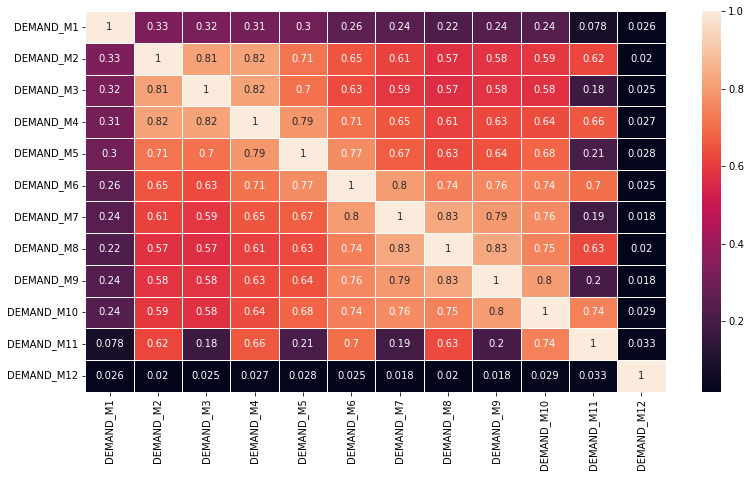

In [40]:
# df demand corr
plt.figure(figsize = (13,7))

corr03 = df.corr()

sns.heatmap(data = corr03.iloc[24:36,24:36], annot = True, fmt = '.2g', linewidth = 1)

plt.show()

In [41]:
demand = df.iloc[:,24:36].copy() # demand degerlerini incelemek istersek
demand.head()

,DEMAND_M1,DEMAND_M2,DEMAND_M3,DEMAND_M4,DEMAND_M5,DEMAND_M6,DEMAND_M7,DEMAND_M8,DEMAND_M9,DEMAND_M10,DEMAND_M11,DEMAND_M12
0,5.772,7.664,NaN,7.228,8.520,4.524,6.028,5.820,2.580,6.264,7.172,3.008
1,5.196,7.884,8.396,6.692,5.972,6.832,3.304,3.772,3.808,3.124,3.276,7.988
2,4.644,3.816,2.880,4.136,2.440,1.672,1.372,1.664,2.188,2.152,2.352,2.236
3,0.160,0.364,0.404,0.424,0.284,0.356,0.204,0.156,0.208,0.288,0.268,0.296
4,4.168,4.156,3.180,4.180,2.740,3.124,4.108,2.900,4.288,3.508,4.424,7.324


Öncelikle oluşturulan kolonlarda işlem yapabilmek için kolonlar geçici olarak -1 değeriyle dolduruldu.

In [42]:
# demande 5 yeni kolon ekle

demand["aylik_ort_demand"] = np.nan
demand["max_demand"] = np.nan
demand["min_demand"] = np.nan
demand["max_aylik_demand_degisimi"] = np.nan
demand["demand_null_sayisi"] = np.nan

demand.fillna(-1, inplace=True)
demand.head()

,DEMAND_M1,DEMAND_M2,DEMAND_M3,DEMAND_M4,DEMAND_M5,DEMAND_M6,DEMAND_M7,DEMAND_M8,DEMAND_M9,DEMAND_M10,DEMAND_M11,DEMAND_M12,aylik_ort_demand,max_demand,min_demand,max_aylik_demand_degisimi,demand_null_sayisi
0,5.772,7.664,-1.000,7.228,8.520,4.524,6.028,5.820,2.580,6.264,7.172,3.008,-1.0,-1.0,-1.0,-1.0,-1.0
1,5.196,7.884,8.396,6.692,5.972,6.832,3.304,3.772,3.808,3.124,3.276,7.988,-1.0,-1.0,-1.0,-1.0,-1.0
2,4.644,3.816,2.880,4.136,2.440,1.672,1.372,1.664,2.188,2.152,2.352,2.236,-1.0,-1.0,-1.0,-1.0,-1.0
3,0.160,0.364,0.404,0.424,0.284,0.356,0.204,0.156,0.208,0.288,0.268,0.296,-1.0,-1.0,-1.0,-1.0,-1.0
4,4.168,4.156,3.180,4.180,2.740,3.124,4.108,2.900,4.288,3.508,4.424,7.324,-1.0,-1.0,-1.0,-1.0,-1.0


Demand kolonları veri setinden ayrıştırılarak işlem yapıldı.

In [43]:
demand1 = demand.iloc[:,:12]

Burada "aylik_ort_demand", "max_demand ve "min_demand" kolonlarının hesaplaması yapılır. Ayrıca aydan ayda değişimin maksimum olduğu değerler tutularak "max_aylik_demand_degisimi" kolonu hesaplanır.

In [44]:
monthly_avg = 0.0
monthly_min = 999.00
monthly_max = 0.0
demand_diff = 0 
temp = 0

for i in range(len(demand1)): # satirlar arasi dolasir
    for month in demand1: # sutunlar arasi dolasir
        
        if(demand[month].values[i] != -1 and temp != -1): # degerler null degilse fark hesaplanir
            diff = abs(demand[month].values[i] - temp)
            if(diff > demand_diff and temp != 0):
                demand_diff = diff
            temp = demand[month].values[i]
            
        if(demand[month].values[i] != -1): # nulları -1 ile doldurmustuk onlari ort hesabina katmiyoruz
            monthly_avg += demand[month].values[i]
            
        if(demand[month].values[i] > monthly_max): # kullanicinin aylık max tuketimi hesaplanir
            monthly_max = demand[month].values[i]
            
        if(demand[month].values[i] < monthly_min and demand[month].values[i] != -1): # kullanicinin aylık min tuketimi hesaplanir
            monthly_min = demand[month].values[i]
            
        
    monthly_avg = monthly_avg/len(demand1.columns)
    
    demand["aylik_ort_demand"].values[i] = monthly_avg
    demand["max_demand"].values[i] = monthly_max
    demand["min_demand"].values[i] = monthly_min
    demand["max_aylik_demand_degisimi"].values[i] = demand_diff
    
    monthly_avg = 0.0
    monthly_min = 999.00
    monthly_max = 0.0
    demand_diff = 0 
    temp = 0.0

Demand için satır bazında null değer hesaplaması yapıldı.

In [45]:
# null (-1) demand degerleri kullanicinin aylik ort demandi ile doldurulur, null sayisi hesaplanir

for i in range(len(demand1)): # satirlar arasi dolasir
    for month in demand1: # sutunlar arasi dolasir  
        if(demand[month].values[i] == -1): # nulları 0 ile doldurmustuk
            demand[month].values[i] = demand["aylik_ort_demand"].values[i] # -1 olan deger, ort ile degistirildi
            counter += 1
    demand["demand_null_sayisi"].values[i] = counter
    counter = 0
    
demand.head()

,DEMAND_M1,DEMAND_M2,DEMAND_M3,DEMAND_M4,DEMAND_M5,DEMAND_M6,DEMAND_M7,DEMAND_M8,DEMAND_M9,DEMAND_M10,DEMAND_M11,DEMAND_M12,aylik_ort_demand,max_demand,min_demand,max_aylik_demand_degisimi,demand_null_sayisi
0,5.772,7.664,5.381667,7.228,8.520,4.524,6.028,5.820,2.580,6.264,7.172,3.008,5.381667,8.520,2.580,4.164,1.0
1,5.196,7.884,8.396000,6.692,5.972,6.832,3.304,3.772,3.808,3.124,3.276,7.988,5.520333,8.396,3.124,4.712,0.0
2,4.644,3.816,2.880000,4.136,2.440,1.672,1.372,1.664,2.188,2.152,2.352,2.236,2.629333,4.644,1.372,1.696,0.0
3,0.160,0.364,0.404000,0.424,0.284,0.356,0.204,0.156,0.208,0.288,0.268,0.296,0.284333,0.424,0.156,0.204,0.0
4,4.168,4.156,3.180000,4.180,2.740,3.124,4.108,2.900,4.288,3.508,4.424,7.324,4.008333,7.324,2.740,2.900,0.0


Demand/Tüketim oranlarını hesaplayabilmek için önce tüketimlerin yıllık farkı alınarak 12 aya düşürüldü. Daha sonra demand ve tüketim kolonlarının maksimum değerleri oranlanarak "max_demand/tuketim_orani" kolonu hesaplandı.

In [46]:
# demand / tuketim orani -> max orani tut
# tuketimleri 12 aya düsür -> demand / tuketimlerin yillik farki -> 0-1 arası deger alabilir

demand["max_demand/tuketim_orani"] = np.nan

months = []
for x in tuketim1:
    months.append(x)

dmonths = []
for x in demand1:
    dmonths.append(x)
    
len_m = 12 # 12 ay verir
max_percent = 0


for i in range(len(tuketim)): # satir bazinda dolasir
    for j in range(len_m):
        month = months[j]
        nmonth = months[j+12]
        dmonth = dmonths[j]
        
        diff = abs(tuketim[month].values[i] - tuketim[nmonth].values[i])
 
        if(diff >= demand[dmonth].values[i]):
            percent = demand[dmonth].values[i] / diff 
            if(percent > max_percent):
                max_percent = percent
    demand["max_demand/tuketim_orani"].values[i] = max_percent      
    max_percent = 0

## Outlier Yaklaşımı

Outlier veriler, veri setindeki beklenmedik değerleri içeren verilerdir. Bu veriler, veri setindeki değişkenliği artırırken istatistiksel gücü azaltırlar. Genellikle çeşitli yöntemlerle veri setinden temizleme yoluna gidilir. Fakat bir fraud detection uygulamasında elimizdeki fraud değerleri kaybetmek istemediğimiz için bu verileri temizlemeyiz. Bu yüzden outlier verilere farklı bir yaklaşım göstererek bir kolon oluşturma yoluna gidildi.

Örneğin 5. aydaki demand sayılarındaki outlier veriler aşağıdaki gibidir. Bu veriler temizlenmek yerine bir kolon oluşturma yoluna gidilmiştir.
- ***OUTLIER_SAYISI*** adlı kolon her kullanıcının tüketim değerleri için outlier sayısını tutan bir kolondur. Outlier sayılarından yola çıkarak kullanıcıların tüketim trendleri ve fraud yapma olasılıkları hakkında bilgi edinilebilmektedir.

<AxesSubplot:xlabel='NK_FLAG', ylabel='DEMAND_M5'>

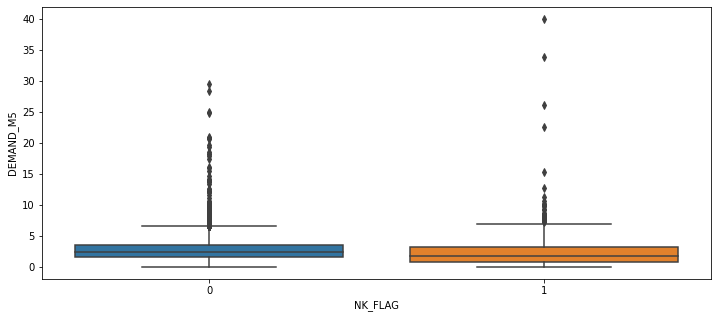

In [47]:
plt.figure(figsize=(12, 5))
sns.boxplot(x="NK_FLAG", y="DEMAND_M5", data=df)

Kullanıcı trendini bir zaman serisi şeklinde gösterebilmek için gruplama yapılmıştır. İnceleme grubu olarak tesisat tipi ***mesken*** olan  kullanıcılar seçilmiştir ve bunların tüketim trendleri incelenmektedir.

In [48]:
fraud_tuketim_mesken = df[(df["NK_FLAG"]== 1) & (df["TESISAT_TIPI"] == "Mesken")] .iloc[:,0:24]
no_fraud_tuketim_mesken =  df[(df["NK_FLAG"]== 0) & (df["TESISAT_TIPI"] == "Mesken")] .iloc[:,0:24]

fraud_tuketim_meskenT = fraud_tuketim_mesken.T
no_fraud_tuketim_meskenT = no_fraud_tuketim_mesken.T

Fraud yapmış kullanıcıların trendinde büyük çoğunlukla çok yüksek bir tüketim sonrası tüketimde ciddi bir düşüş görülüyor ve sonrasında tüketim uzun bir süre sabit ilerliyor. Ayrıca bu yükseliş ve düşüşler çok fazla olmadığından kullanıcı bazında outlier sayısı düşük olanlar tüketimleri stabil ilerlediği için fraud yapma olasılıkları var diyebiliriz.

<AxesSubplot:>

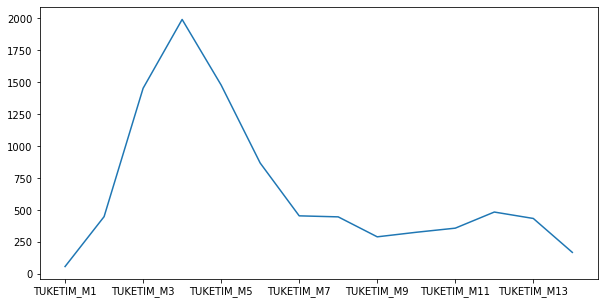

In [49]:
#indexi 5 olan fraud yapmış kullanıcı
plt.figure(figsize=(10,5))
kullanici5 = fraud_tuketim_meskenT[5]
kullanici5.plot()

<AxesSubplot:>

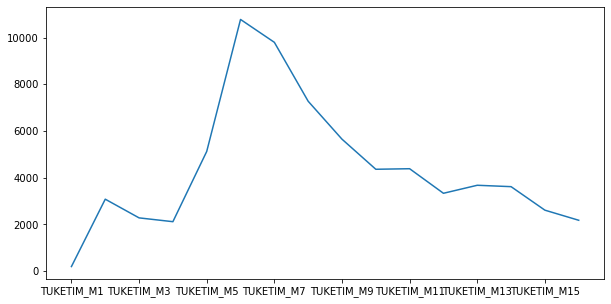

In [50]:
#indexi 14883 olan fraud yapmış kullanıcı
plt.figure(figsize=(10,5))
kullanici14883 = fraud_tuketim_meskenT[14883]
kullanici14883.plot()

Fraud yapmayan kullanıcılarda ise tüketim değerlerinde değişkenlik gösteren, outlier sayıları fazla bir grafik gözlemlenmektedir.

<AxesSubplot:>

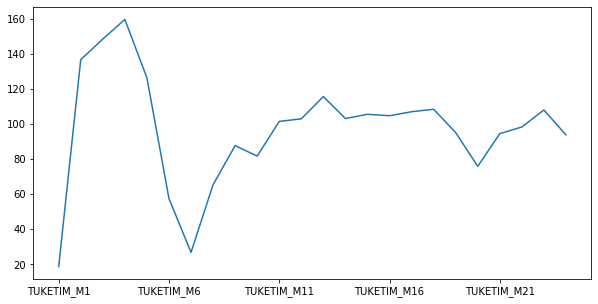

In [51]:
#indexi 14987 olan fraud yapmamış kullanıcı
plt.figure(figsize=(10,5))
kullanici14987 = no_fraud_tuketim_meskenT[14987]
kullanici14987.plot()

<AxesSubplot:>

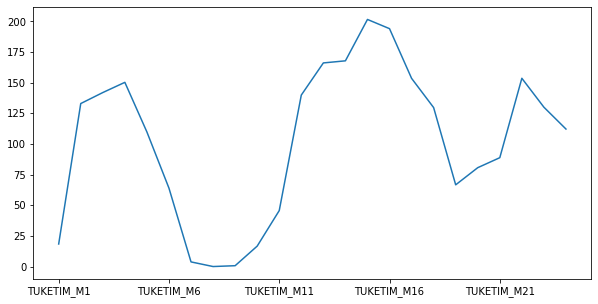

In [52]:
##indexi 14994 olan fraud yapmamış kullanıcı
plt.figure(figsize=(10,5))
kullanici14994 = no_fraud_tuketim_meskenT[14994]
kullanici14994.plot()

Outlier değerlerinin hesaplanması için IQR(Interquantile Range) hesaplaması yapılmıştır ve ***OUTLIER_SAYISI*** kolonu oluşturulmuştur.

In [53]:
transpozed_df = df.iloc[:, 0:24].T
Q1 = transpozed_df.quantile(0.25)
Q3 = transpozed_df.quantile(0.75)
IQR = Q3 - Q1
demand["OUTLIER_SAYISI"] = ((transpozed_df < (Q1 - 1.5 * IQR)) | (transpozed_df > (Q3 + 1.5 * IQR))).sum()

In [54]:
df

,TUKETIM_M1,TUKETIM_M2,TUKETIM_M3,TUKETIM_M4,TUKETIM_M5,TUKETIM_M6,TUKETIM_M7,TUKETIM_M8,TUKETIM_M9,TUKETIM_M10,...,SAYAC_MODEL,SAYAC_MALZEME_ID,SAYAC_OLCUM_TURU,SAYAC_FAZ_N,SAYAC_TAKILMA_TARIHI,SAYAC_YAPIM_YILI,NK_FLAG,MAHALLE_RISK_SKORU_group,SOKAK_RISK_SKORU_group,SOB_RISK_SKORU_group
0,54.067286,260.483048,275.618048,273.467499,281.655063,352.713057,415.387382,506.970118,536.242000,497.518271,...,LUN1,80000100.0,Aktif,Monofaze,2016-10-18,2015 Öncesi,0,Orta,Düşük,Düşük
1,125.413387,227.864889,253.651891,230.289027,241.382306,248.334700,217.821800,249.203886,246.356225,203.709124,...,EC058MBW,80000730.0,Aktif,Monofaze,2016-09-25,2015 ve sonrası,0,Düşük,Yüksek,Yüksek
2,308.273107,386.164464,392.016065,238.200398,163.968966,162.782897,187.088937,212.920402,204.618086,181.509614,...,EC15ATBW,80000730.0,Aktif,Trifaze,2016-10-11,2015 ve sonrası,0,Düşük,Düşük,Çok Düşük
3,23.105143,49.197286,64.653696,73.807875,31.418710,31.834563,24.261624,27.079161,26.952110,32.072690,...,LUN10,80000710.0,Aktif,Monofaze,2016-05-24,2015 ve sonrası,0,Yüksek,Düşük,Orta
4,36.016793,48.795995,50.209868,50.969201,49.746943,89.461700,328.368786,469.163521,432.848994,461.588897,...,LUN10-B,80001000.0,Aktif,Monofaze,2018-05-30,2015 ve sonrası,0,Düşük,Düşük,Düşük
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,48.759310,242.282118,305.187862,364.041376,335.741105,270.324229,261.348077,379.654869,421.752054,302.090882,...,LUN10,80000710.0,Aktif,Monofaze,2017-09-06,2015 ve sonrası,0,Orta,Yüksek,Yüksek
14996,22.899931,221.434843,237.899774,237.992259,193.459992,230.845648,235.719764,335.931917,318.189711,201.489560,...,EC058MBW,80000730.0,Aktif,Monofaze,2016-10-06,2015 Öncesi,0,Düşük,Düşük,Düşük
14997,35.103419,146.619759,172.015377,198.324000,180.250033,140.946512,143.669681,152.438057,151.259252,164.891766,...,LUN1,80000100.0,Aktif,Monofaze,2016-09-28,2015 Öncesi,0,Orta,Düşük,Düşük
14998,1.191094,6.105906,10.661600,6.234114,16.302857,16.211857,60.845087,114.472218,16.684195,0.895071,...,AEL.MF.07,80000520.0,Aktif,Monofaze,2016-10-12,2015 Öncesi,0,Düşük,Düşük,Orta


## Ordinal Encoding

İçerisinde ordinal değerler bulunan kolonlar için ***Label Encoding*** alfabetik sıraya göre encode yaptığı için değerlerin ağırlıklarını istediğimiz gibi belirleyebilmek için ***Ordinal Encoding*** yapılması gerekmektedir. "SAYAC_MARKA", "SOB_RISK_SKORU_group", "SOKAK_RISK_SKORU_group" ve "MAHALLE_RISK_SKORU_group" kolonlarına aşağıda görüldüğü gibi ordinal encoding işlemi yapılmıştır.

In [55]:
df["MAHALLE_RISK_SKORU_group_encoded"] = df["MAHALLE_RISK_SKORU_group"].map(
    {'Düşük':1, 'Orta':2, 'Yüksek':3})

df["SOKAK_RISK_SKORU_group_encoded"] = df["SOKAK_RISK_SKORU_group"].map(
    {'Düşük':1,'Yüksek':2})

df["SOB_RISK_SKORU_group_encoded"] = df["SOB_RISK_SKORU_group"].map(
    {'Çok Düşük':1, 'Düşük':2,'Orta':3, 'Yüksek':4})

df["SAYAC_MARKA_encoded"] = df["SAYAC_MARKA"].map(
    {'Orta - Düşük Risk':1, 'Yüksek Risk':2,'Çok Yüksek Risk':3})

In [56]:
ordinal_columns = ["MAHALLE_RISK_SKORU_group", "SOKAK_RISK_SKORU_group", "SOB_RISK_SKORU_group", "SAYAC_MARKA"]
df = df.drop(ordinal_columns, axis=1)

In [57]:
df.head()

,TUKETIM_M1,TUKETIM_M2,TUKETIM_M3,TUKETIM_M4,TUKETIM_M5,TUKETIM_M6,TUKETIM_M7,TUKETIM_M8,TUKETIM_M9,TUKETIM_M10,...,SAYAC_MALZEME_ID,SAYAC_OLCUM_TURU,SAYAC_FAZ_N,SAYAC_TAKILMA_TARIHI,SAYAC_YAPIM_YILI,NK_FLAG,MAHALLE_RISK_SKORU_group_encoded,SOKAK_RISK_SKORU_group_encoded,SOB_RISK_SKORU_group_encoded,SAYAC_MARKA_encoded
0,54.067286,260.483048,275.618048,273.467499,281.655063,352.713057,415.387382,506.970118,536.242000,497.518271,...,80000100.0,Aktif,Monofaze,2016-10-18,2015 Öncesi,0,2,1,2,2
1,125.413387,227.864889,253.651891,230.289027,241.382306,248.334700,217.821800,249.203886,246.356225,203.709124,...,80000730.0,Aktif,Monofaze,2016-09-25,2015 ve sonrası,0,1,2,4,1
2,308.273107,386.164464,392.016065,238.200398,163.968966,162.782897,187.088937,212.920402,204.618086,181.509614,...,80000730.0,Aktif,Trifaze,2016-10-11,2015 ve sonrası,0,1,1,1,1
3,23.105143,49.197286,64.653696,73.807875,31.418710,31.834563,24.261624,27.079161,26.952110,32.072690,...,80000710.0,Aktif,Monofaze,2016-05-24,2015 ve sonrası,0,3,1,3,2
4,36.016793,48.795995,50.209868,50.969201,49.746943,89.461700,328.368786,469.163521,432.848994,461.588897,...,80001000.0,Aktif,Monofaze,2018-05-30,2015 ve sonrası,0,1,1,2,2


"Tüketim", "Demand" ve "Others" olarak ayrılan 3 veri setini birleştirmek için concat işlemi yapılmaktadır.

In [58]:
others = df.iloc[:,36:54].copy() # kalan feature'lari incelemek icin

In [59]:
df = pd.concat([tuketim,demand,others], axis=1)
df

,TUKETIM_M1,TUKETIM_M2,TUKETIM_M3,TUKETIM_M4,TUKETIM_M5,TUKETIM_M6,TUKETIM_M7,TUKETIM_M8,TUKETIM_M9,TUKETIM_M10,...,SAYAC_MALZEME_ID,SAYAC_OLCUM_TURU,SAYAC_FAZ_N,SAYAC_TAKILMA_TARIHI,SAYAC_YAPIM_YILI,NK_FLAG,MAHALLE_RISK_SKORU_group_encoded,SOKAK_RISK_SKORU_group_encoded,SOB_RISK_SKORU_group_encoded,SAYAC_MARKA_encoded
0,54.067286,260.483048,275.618048,273.467499,281.655063,352.713057,415.387382,506.970118,536.242000,497.518271,...,80000100.0,Aktif,Monofaze,2016-10-18,2015 Öncesi,0,2,1,2,2
1,125.413387,227.864889,253.651891,230.289027,241.382306,248.334700,217.821800,249.203886,246.356225,203.709124,...,80000730.0,Aktif,Monofaze,2016-09-25,2015 ve sonrası,0,1,2,4,1
2,308.273107,386.164464,392.016065,238.200398,163.968966,162.782897,187.088937,212.920402,204.618086,181.509614,...,80000730.0,Aktif,Trifaze,2016-10-11,2015 ve sonrası,0,1,1,1,1
3,23.105143,49.197286,64.653696,73.807875,31.418710,31.834563,24.261624,27.079161,26.952110,32.072690,...,80000710.0,Aktif,Monofaze,2016-05-24,2015 ve sonrası,0,3,1,3,2
4,36.016793,48.795995,50.209868,50.969201,49.746943,89.461700,328.368786,469.163521,432.848994,461.588897,...,80001000.0,Aktif,Monofaze,2018-05-30,2015 ve sonrası,0,1,1,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,48.759310,242.282118,305.187862,364.041376,335.741105,270.324229,261.348077,379.654869,421.752054,302.090882,...,80000710.0,Aktif,Monofaze,2017-09-06,2015 ve sonrası,0,2,2,4,2
14996,22.899931,221.434843,237.899774,237.992259,193.459992,230.845648,235.719764,335.931917,318.189711,201.489560,...,80000730.0,Aktif,Monofaze,2016-10-06,2015 Öncesi,0,1,1,2,1
14997,35.103419,146.619759,172.015377,198.324000,180.250033,140.946512,143.669681,152.438057,151.259252,164.891766,...,80000100.0,Aktif,Monofaze,2016-09-28,2015 Öncesi,0,2,1,2,2
14998,1.191094,6.105906,10.661600,6.234114,16.302857,16.211857,60.845087,114.472218,16.684195,0.895071,...,80000520.0,Aktif,Monofaze,2016-10-12,2015 Öncesi,0,1,1,3,1


## Kolonların Drop Edilmesi

Modeli eğitmek açısından gereksiz bulunan kolonlar "drops" adlı listede listelenmiştir. Bunlar veri setinden kaldırılacaktır.

In [60]:
drops = ["SAYAC_MODEL", "SAYAC_MALZEME_ID",
         "SAYAC_BASLANGIC_TARIHI", "SAYAC_BITIS_TARIHI", 
         "SAYAC_TAKILMA_TARIHI", "SOB_RISK_SKORU", "SOKAK_RISK_SKORU", "MAHALLE_RISK_SKORU"]
df.drop(drops,axis=1,inplace=True)

In [61]:
df.columns

Index(['TUKETIM_M1', 'TUKETIM_M2', 'TUKETIM_M3', 'TUKETIM_M4', 'TUKETIM_M5',
       'TUKETIM_M6', 'TUKETIM_M7', 'TUKETIM_M8', 'TUKETIM_M9', 'TUKETIM_M10',
       'TUKETIM_M11', 'TUKETIM_M12', 'TUKETIM_M13', 'TUKETIM_M14',
       'TUKETIM_M15', 'TUKETIM_M16', 'TUKETIM_M17', 'TUKETIM_M18',
       'TUKETIM_M19', 'TUKETIM_M20', 'TUKETIM_M21', 'TUKETIM_M22',
       'TUKETIM_M23', 'TUKETIM_M24', 'aylik_ort_tuketim', 'max_tuketim',
       'min_tuketim', 'max_aylik_tuketim_dususu', 'max_yillik_tuketim_dususu',
       'tuketim_null_sayisi', 'DEMAND_M1', 'DEMAND_M2', 'DEMAND_M3',
       'DEMAND_M4', 'DEMAND_M5', 'DEMAND_M6', 'DEMAND_M7', 'DEMAND_M8',
       'DEMAND_M9', 'DEMAND_M10', 'DEMAND_M11', 'DEMAND_M12',
       'aylik_ort_demand', 'max_demand', 'min_demand',
       'max_aylik_demand_degisimi', 'demand_null_sayisi',
       'max_demand/tuketim_orani', 'OUTLIER_SAYISI', 'TESISAT_TIPI',
       'SAYAC_OLCUM_TURU', 'SAYAC_FAZ_N', 'SAYAC_YAPIM_YILI', 'NK_FLAG',
       'MAHALLE_RISK_SKORU_group_e

Veri setinin son hali

In [62]:
df.head()

,TUKETIM_M1,TUKETIM_M2,TUKETIM_M3,TUKETIM_M4,TUKETIM_M5,TUKETIM_M6,TUKETIM_M7,TUKETIM_M8,TUKETIM_M9,TUKETIM_M10,...,OUTLIER_SAYISI,TESISAT_TIPI,SAYAC_OLCUM_TURU,SAYAC_FAZ_N,SAYAC_YAPIM_YILI,NK_FLAG,MAHALLE_RISK_SKORU_group_encoded,SOKAK_RISK_SKORU_group_encoded,SOB_RISK_SKORU_group_encoded,SAYAC_MARKA_encoded
0,54.067286,260.483048,275.618048,273.467499,281.655063,352.713057,415.387382,506.970118,536.242000,497.518271,...,5,Mesken,Aktif,Monofaze,2015 Öncesi,0,2,1,2,2
1,125.413387,227.864889,253.651891,230.289027,241.382306,248.334700,217.821800,249.203886,246.356225,203.709124,...,1,Mesken,Aktif,Monofaze,2015 ve sonrası,0,1,2,4,1
2,308.273107,386.164464,392.016065,238.200398,163.968966,162.782897,187.088937,212.920402,204.618086,181.509614,...,2,Mesken,Aktif,Trifaze,2015 ve sonrası,0,1,1,1,1
3,23.105143,49.197286,64.653696,73.807875,31.418710,31.834563,24.261624,27.079161,26.952110,32.072690,...,2,Ticarethane-Sanayi,Aktif,Monofaze,2015 ve sonrası,0,3,1,3,2
4,36.016793,48.795995,50.209868,50.969201,49.746943,89.461700,328.368786,469.163521,432.848994,461.588897,...,0,Mesken,Aktif,Monofaze,2015 ve sonrası,0,1,1,2,2


# ÇARPIKLIK(SKEWNESS)

Bir dağılımın ne kadar asimetrik olabileceğinin ölçüsü ***çarpıklık*** olarak adlandırılır. Bu düzeltilmesi gereken bir durumdur çünkü çarpık veri eğitilen modelin tahmin oranını azaltmaktadır. Örneğin bu veri setinde kolonların büyük bir çoğunluğu ***Sağa Çarpık*** gözükmektedir. Bu durum sonrası, örneğin tüketim verileri için; tüketim değerlerinin çok düşük olduğu yerde yığılma olduğundan karşılaşacağı düşük değerleri iyi tahmin ederken, ortalama ve yüksek değerleri çok kötü tahminleyeceği anlamına gelir. Bu yüzden verileri normal dağılıma yaklaştırmak gerekir.

In [63]:
df.head()

,TUKETIM_M1,TUKETIM_M2,TUKETIM_M3,TUKETIM_M4,TUKETIM_M5,TUKETIM_M6,TUKETIM_M7,TUKETIM_M8,TUKETIM_M9,TUKETIM_M10,...,OUTLIER_SAYISI,TESISAT_TIPI,SAYAC_OLCUM_TURU,SAYAC_FAZ_N,SAYAC_YAPIM_YILI,NK_FLAG,MAHALLE_RISK_SKORU_group_encoded,SOKAK_RISK_SKORU_group_encoded,SOB_RISK_SKORU_group_encoded,SAYAC_MARKA_encoded
0,54.067286,260.483048,275.618048,273.467499,281.655063,352.713057,415.387382,506.970118,536.242000,497.518271,...,5,Mesken,Aktif,Monofaze,2015 Öncesi,0,2,1,2,2
1,125.413387,227.864889,253.651891,230.289027,241.382306,248.334700,217.821800,249.203886,246.356225,203.709124,...,1,Mesken,Aktif,Monofaze,2015 ve sonrası,0,1,2,4,1
2,308.273107,386.164464,392.016065,238.200398,163.968966,162.782897,187.088937,212.920402,204.618086,181.509614,...,2,Mesken,Aktif,Trifaze,2015 ve sonrası,0,1,1,1,1
3,23.105143,49.197286,64.653696,73.807875,31.418710,31.834563,24.261624,27.079161,26.952110,32.072690,...,2,Ticarethane-Sanayi,Aktif,Monofaze,2015 ve sonrası,0,3,1,3,2
4,36.016793,48.795995,50.209868,50.969201,49.746943,89.461700,328.368786,469.163521,432.848994,461.588897,...,0,Mesken,Aktif,Monofaze,2015 ve sonrası,0,1,1,2,2


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 58 columns):
 #   Column                            Non-Null Count  Dtype   
---  ------                            --------------  -----   
 0   TUKETIM_M1                        15000 non-null  float64 
 1   TUKETIM_M2                        15000 non-null  float64 
 2   TUKETIM_M3                        15000 non-null  float64 
 3   TUKETIM_M4                        15000 non-null  float64 
 4   TUKETIM_M5                        15000 non-null  float64 
 5   TUKETIM_M6                        15000 non-null  float64 
 6   TUKETIM_M7                        15000 non-null  float64 
 7   TUKETIM_M8                        15000 non-null  float64 
 8   TUKETIM_M9                        15000 non-null  float64 
 9   TUKETIM_M10                       15000 non-null  float64 
 10  TUKETIM_M11                       15000 non-null  float64 
 11  TUKETIM_M12                       15000 non-null  floa

Verilerin şu anki dağılımlarının gösterilmesi

Skew:  93.90719058295787


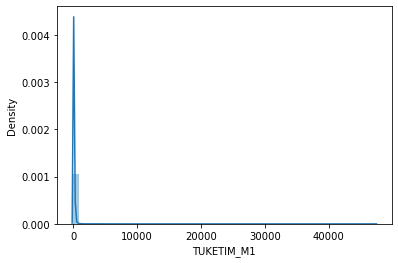

Skew:  95.77987633872715


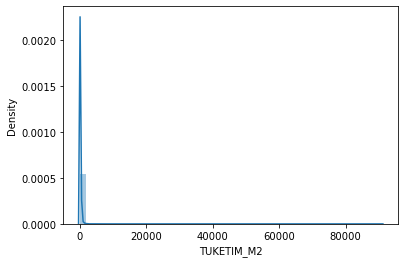

Skew:  52.51488375187794


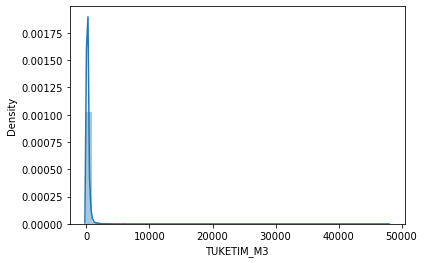

Skew:  107.10946495353876


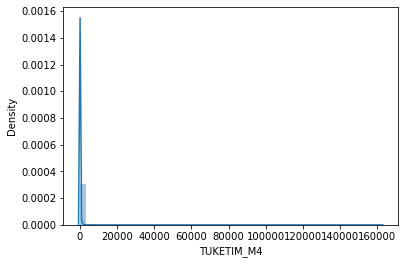

Skew:  80.65532218081191


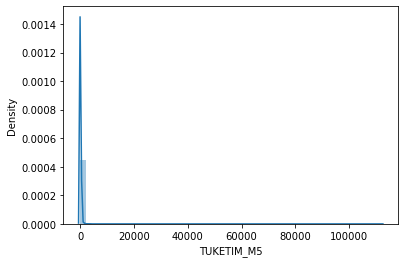

Skew:  76.05209911414929


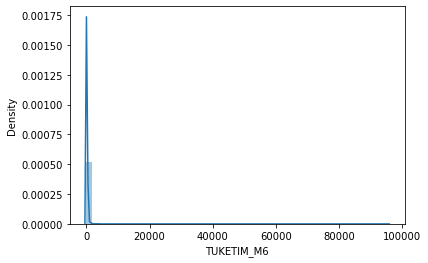

Skew:  73.12552561531957


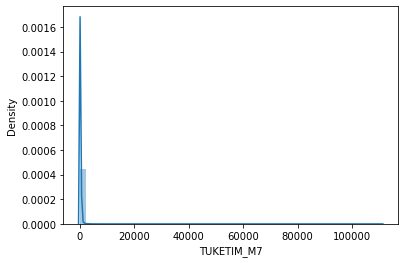

Skew:  80.10846031247583


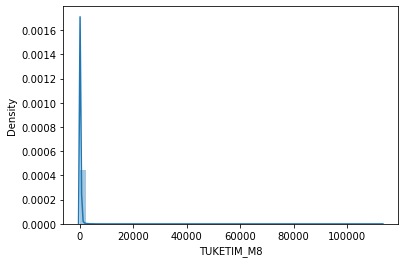

Skew:  66.50879074523519


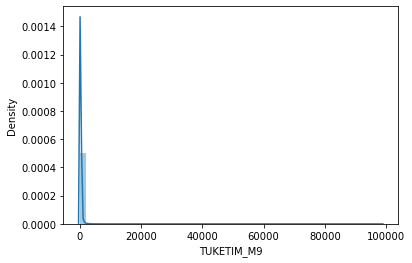

Skew:  88.00903275511409


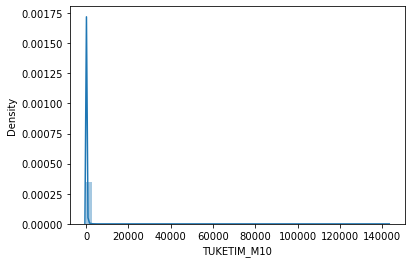

Skew:  61.736618428406366


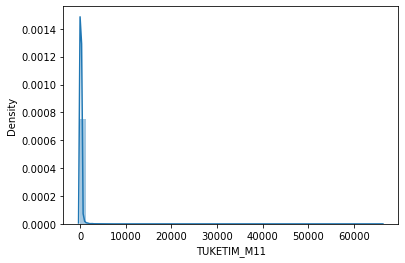

Skew:  90.81365844007885


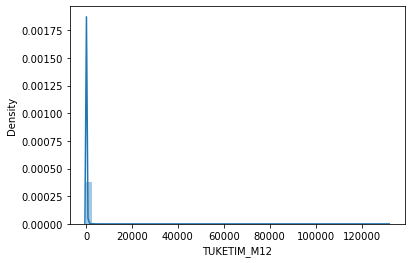

Skew:  87.20324551375221


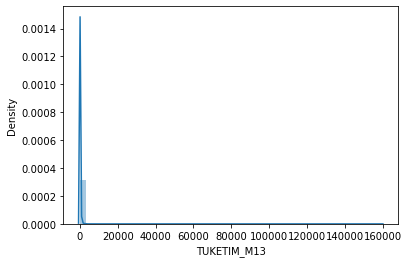

Skew:  89.10746068667406


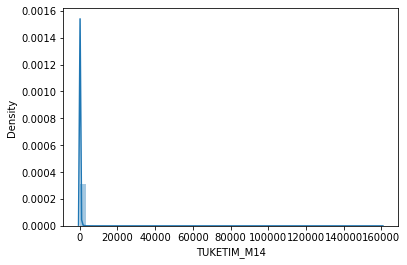

Skew:  57.84562575938918


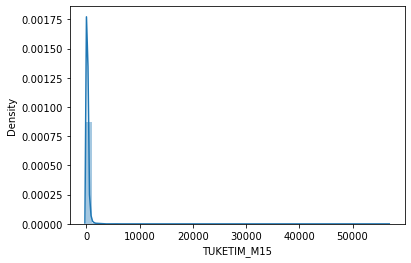

Skew:  73.41234713961917


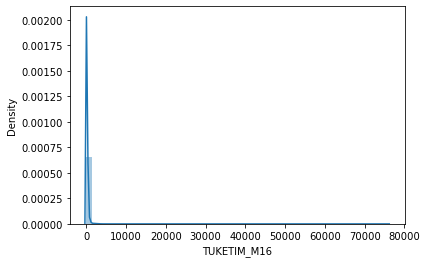

Skew:  61.46861334049913


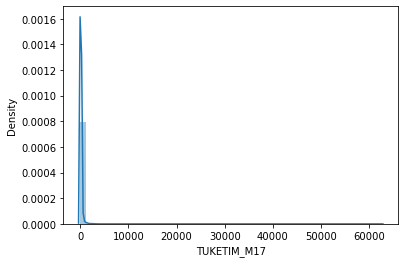

Skew:  84.26106242514868


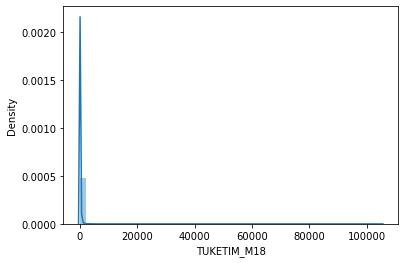

Skew:  68.68703800876345


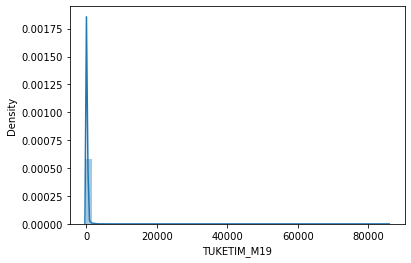

Skew:  55.23802096075122


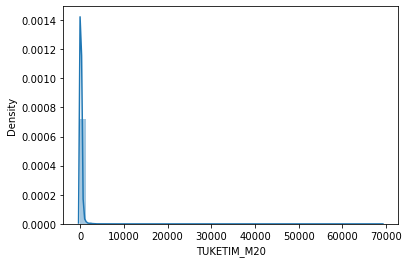

Skew:  62.282875466219814


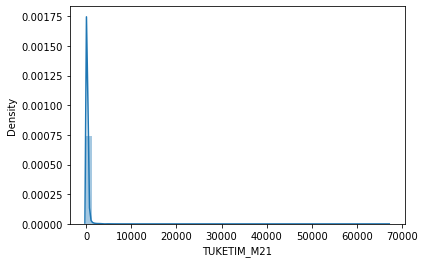

Skew:  73.04303290996513


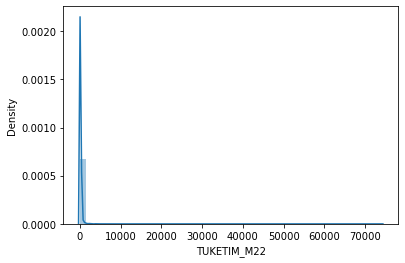

Skew:  76.23663182935283


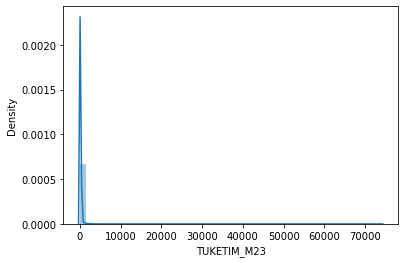

Skew:  76.9417015899945


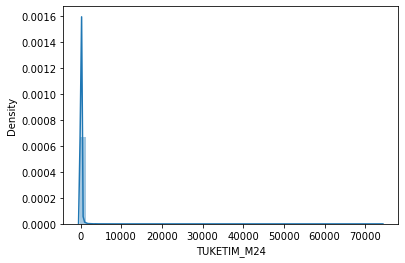

Skew:  71.01129574716111


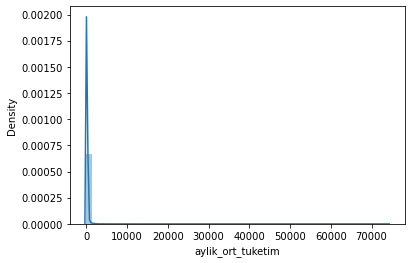

Skew:  70.46273318970388


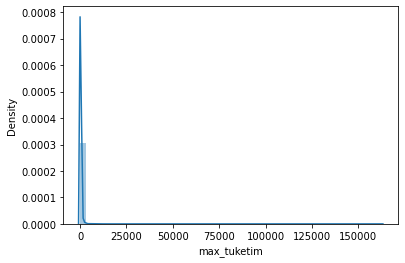

Skew:  4.832971971942759


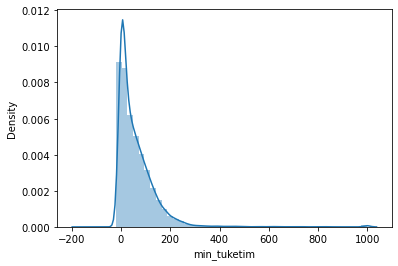

Skew:  76.655024965605


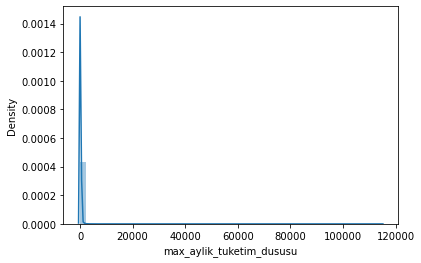

Skew:  74.85301278228778


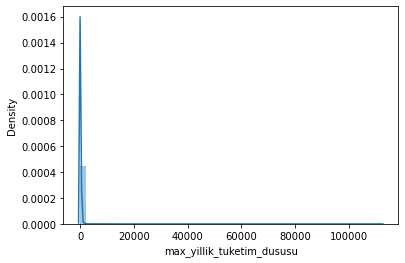

Skew:  6.187380407605764


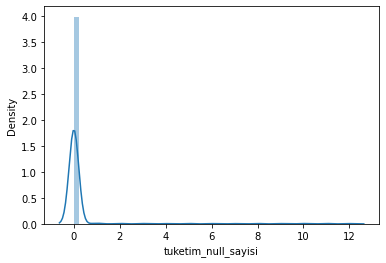

Skew:  89.3988969494685


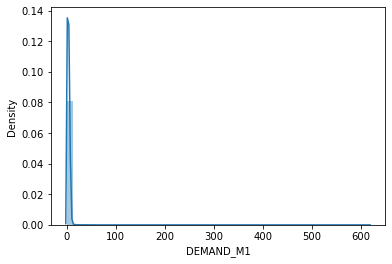

Skew:  4.043869334655806


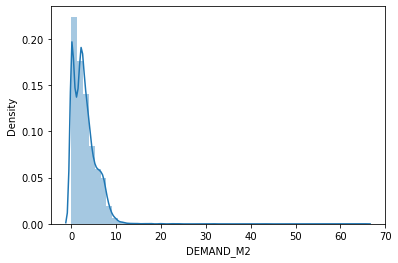

Skew:  5.265145761452067


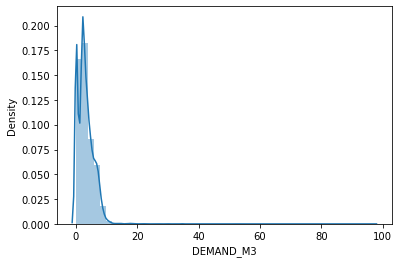

Skew:  4.101927364131315


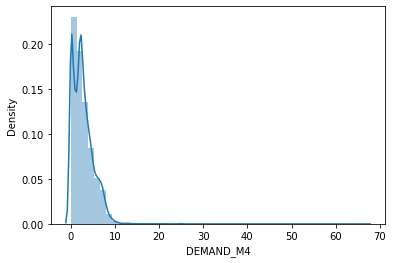

Skew:  2.4209035392519676


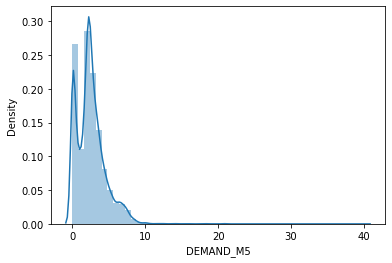

Skew:  6.0406525133272995


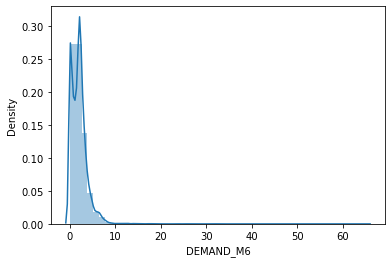

Skew:  5.260758850993762


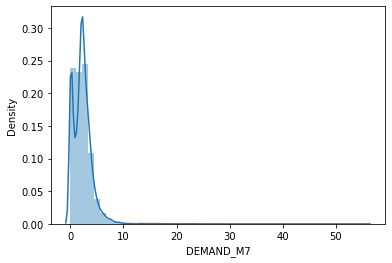

Skew:  6.365040600207381


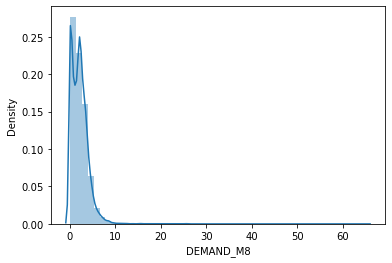

Skew:  3.8731869640068104


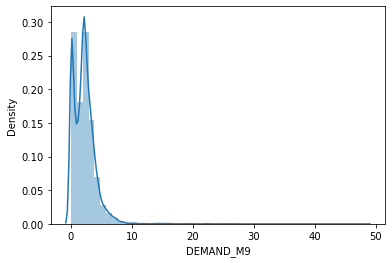

Skew:  4.994326158562117


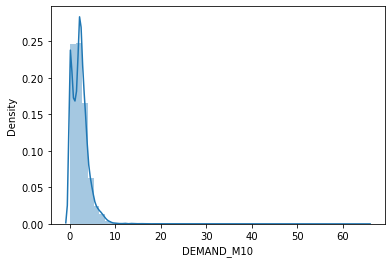

Skew:  104.23377640765229


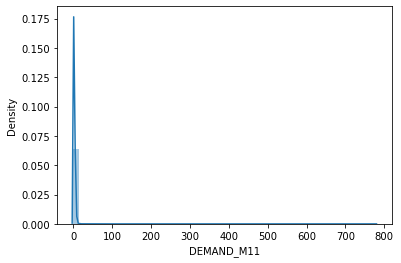

Skew:  122.44155819247102


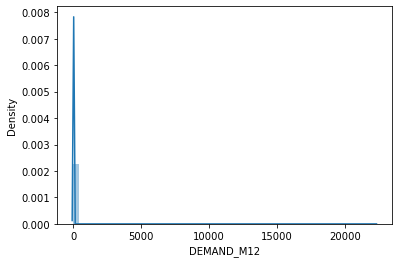

Skew:  119.33675353285524


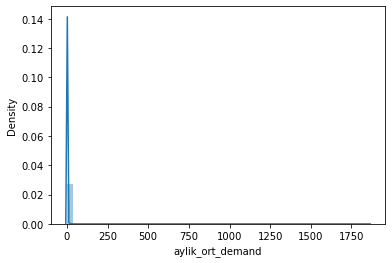

Skew:  122.0674695577615


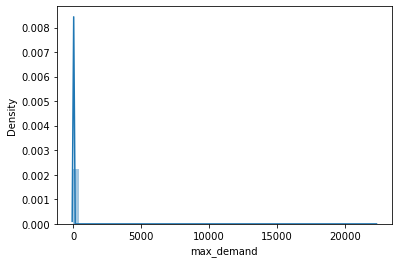

Skew:  14.423894540858555


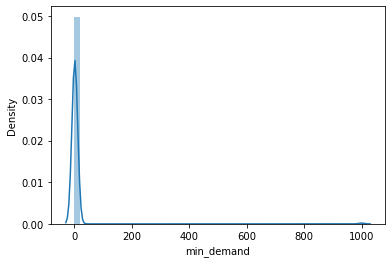

Skew:  122.09529834421147


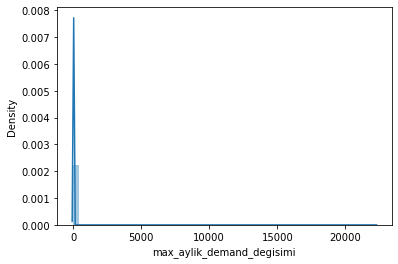

Skew:  1.8918753947234348


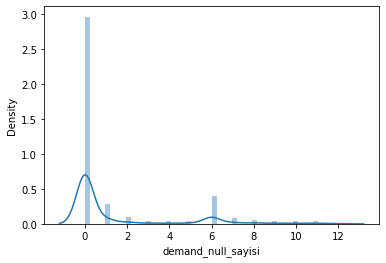

Skew:  0.3249018454222626


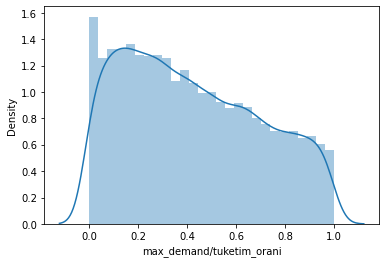

Skew:  1.2668893714611822


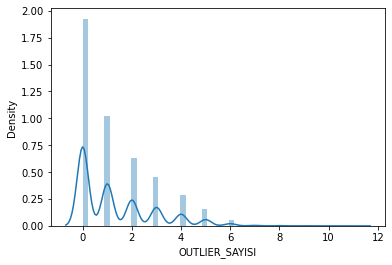

In [65]:
for i in df.iloc[:, 0:49]:
    print ("Skew: ", df[i].skew())
    sns.distplot(df[i])
    plt.show()

Verileri normal dağılıma yaklaştırmak için her değerin karekökünü alma işlemi yapıldı.

Skew 4.851258420812149


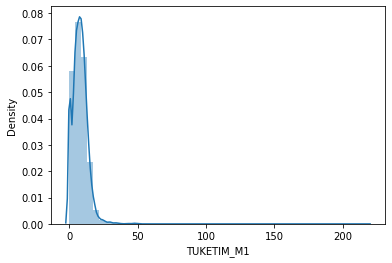

Skew 4.972399147033489


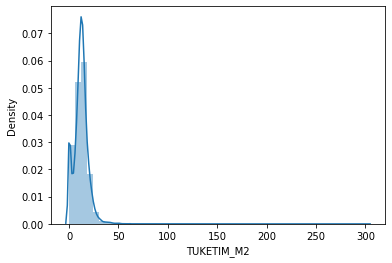

Skew 2.9798998797084235


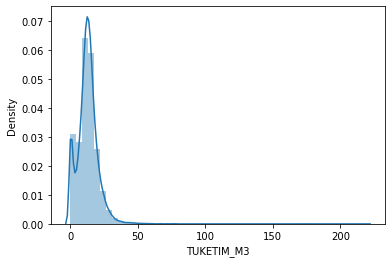

Skew 9.498069227973517


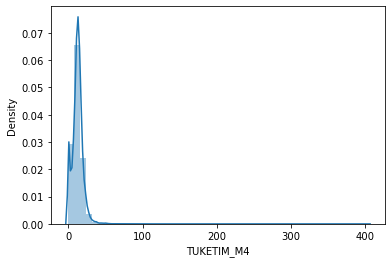

Skew 12.66194753317285


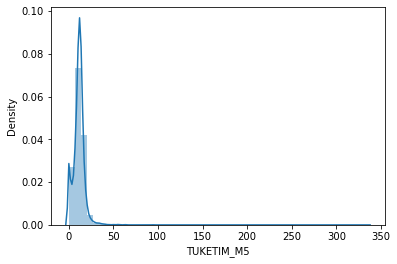

Skew 9.966573270859538


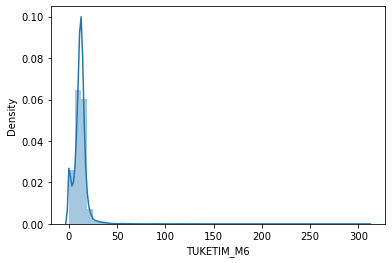

Skew 8.875542459645539


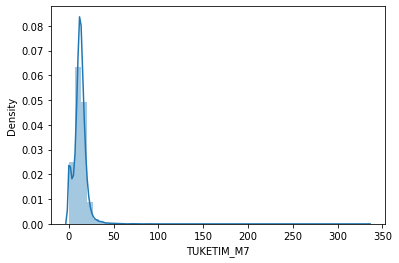

Skew 6.355330926271975


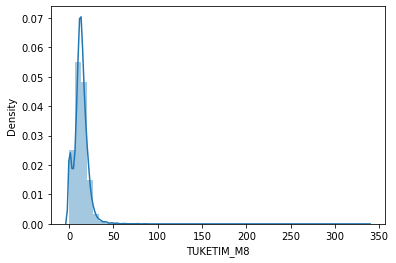

Skew 7.197097888508021


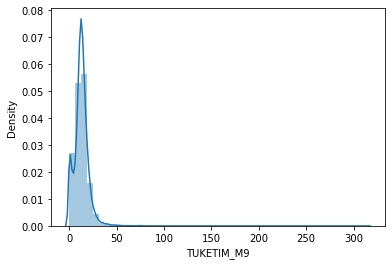

Skew 10.599352384612567


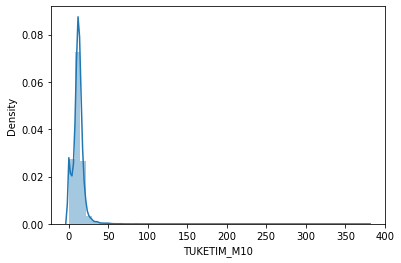

Skew 7.109878060817656


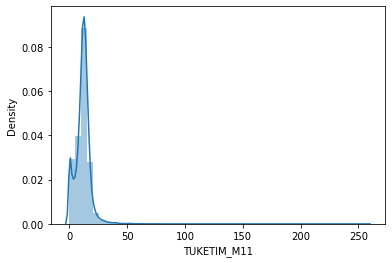

Skew 10.790736492541773


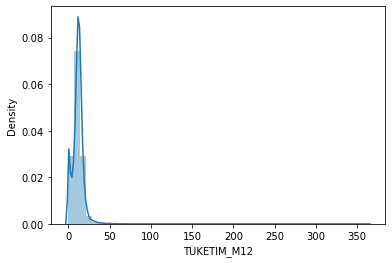

Skew 12.280165296691468


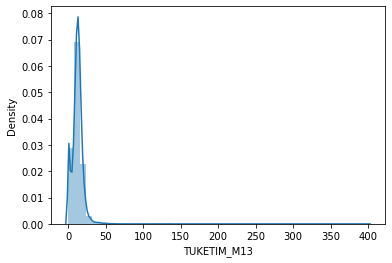

Skew 10.961439279800775


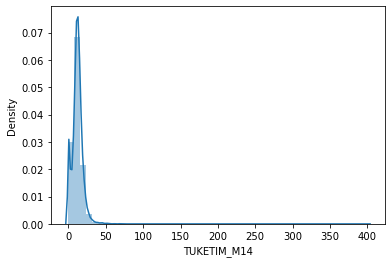

Skew 3.4152091169962637


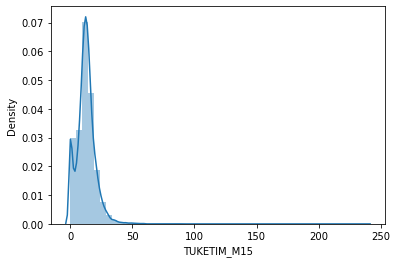

Skew 4.819138630626083


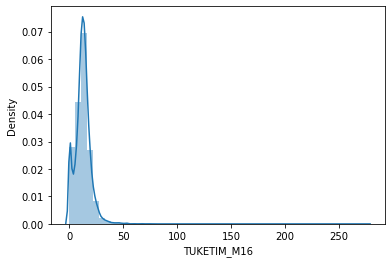

Skew 6.666730528107392


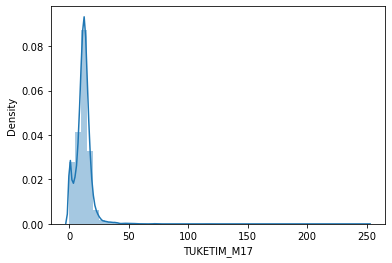

Skew 8.839447171703073


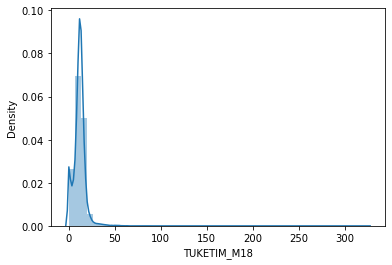

Skew 6.590194363365112


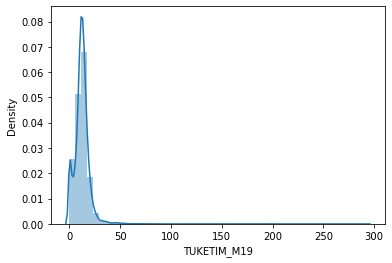

Skew 4.6007333819560206


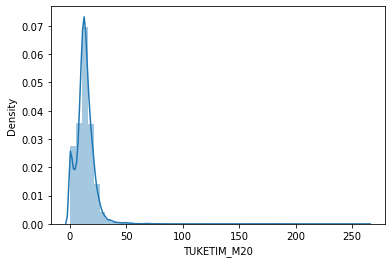

Skew 4.310580608201872


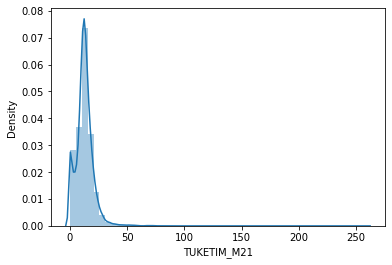

Skew 5.773949900238051


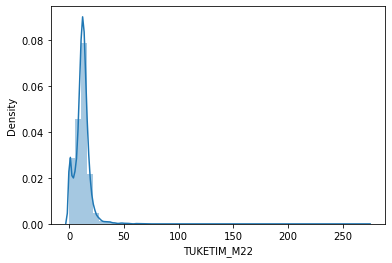

Skew 6.398086325276303


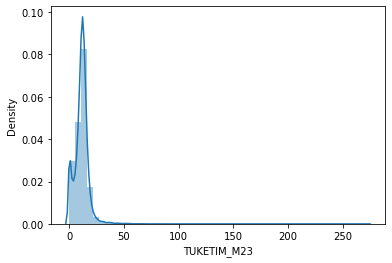

Skew 6.949574689026208


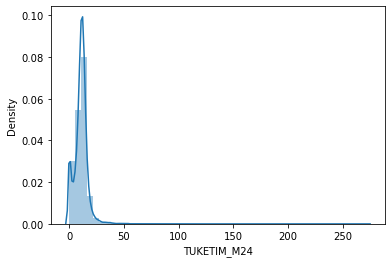

Skew 7.300964685258605


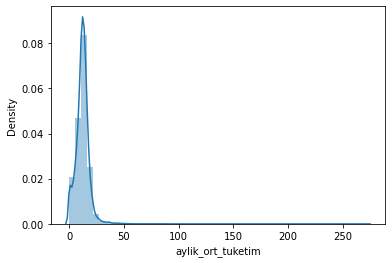

Skew 9.635127053482845


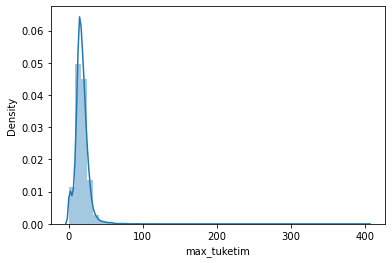

Skew 0.7896699750704909


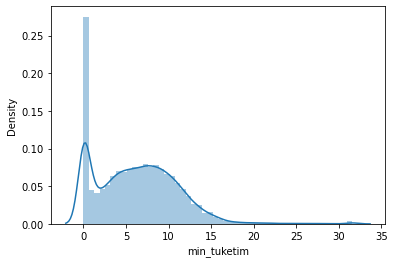

Skew 13.344117741603718


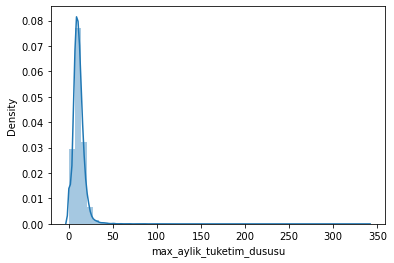

Skew 11.420231029039009


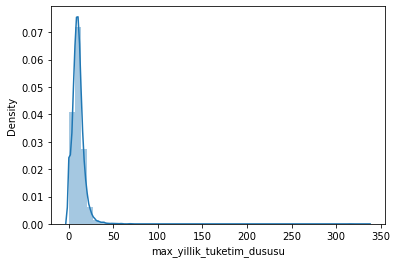

Skew 5.255110222399761


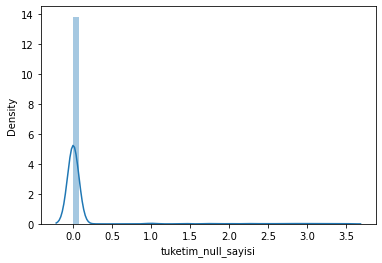

Skew 1.344947516463672


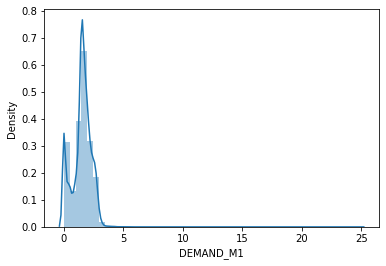

Skew 0.01090192824884634


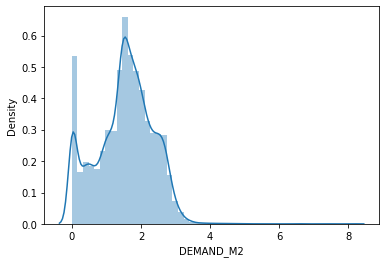

Skew -0.1487768390809066


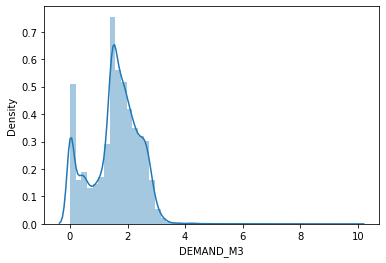

Skew -0.02055758868907241


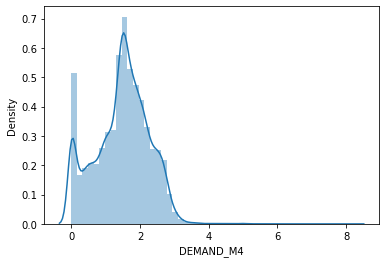

Skew -0.24400844412196357


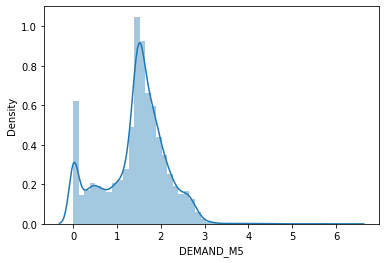

Skew 0.12428989772753896


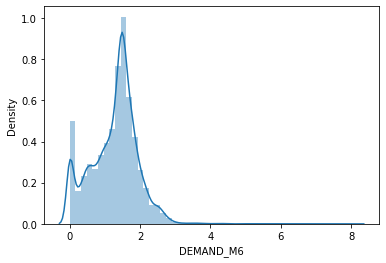

Skew -0.0785416976641573


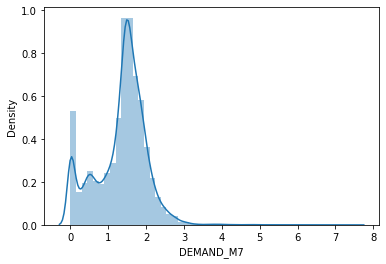

Skew 0.1401812797314045


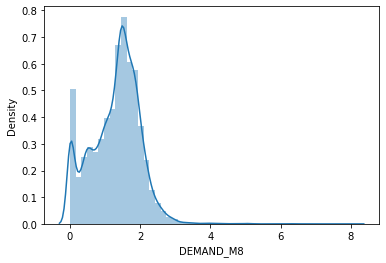

Skew -0.08228545933750328


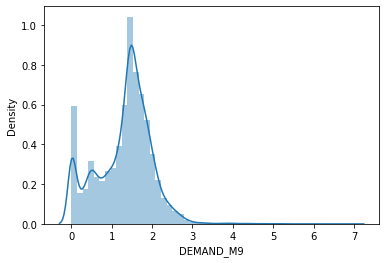

Skew 0.0003901159667622842


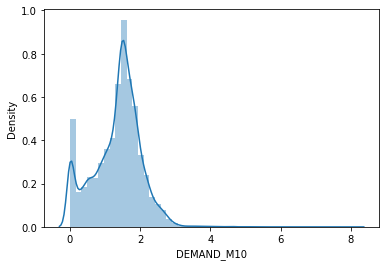

Skew 2.970535927155048


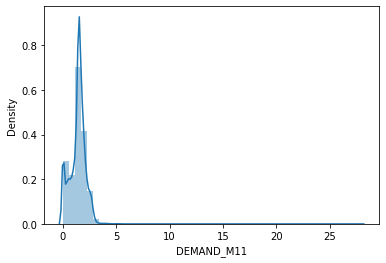

Skew 74.26706862642769


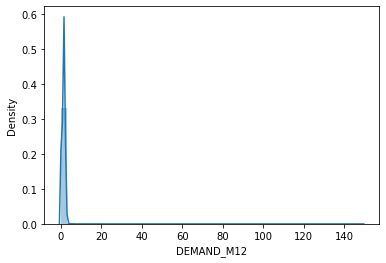

Skew 12.766893301755436


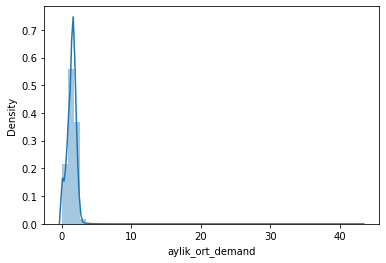

Skew 71.51185730560003


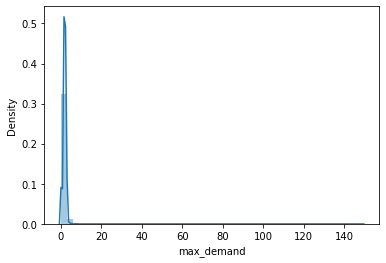

Skew 12.573730448474514


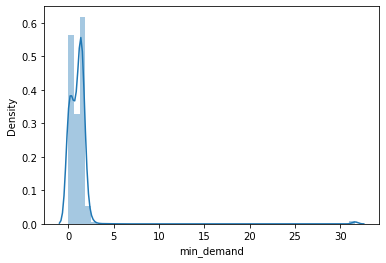

Skew 81.99412655689443


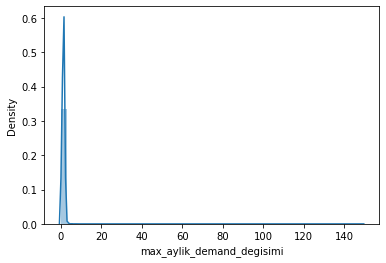

Skew 1.3636259247709885


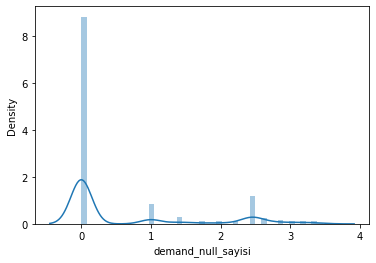

Skew -0.42624673313639055


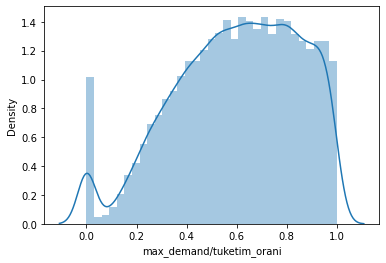

Skew 0.25629613638497506


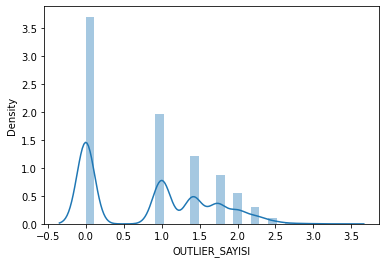

In [66]:
for i in df.iloc[:, 0:49]:
    df[i] = df[i]**(.5)
    print ("Skew", df[i].skew())
    sns.distplot(df[i])
    plt.show()

In [67]:
df.head()

,TUKETIM_M1,TUKETIM_M2,TUKETIM_M3,TUKETIM_M4,TUKETIM_M5,TUKETIM_M6,TUKETIM_M7,TUKETIM_M8,TUKETIM_M9,TUKETIM_M10,...,OUTLIER_SAYISI,TESISAT_TIPI,SAYAC_OLCUM_TURU,SAYAC_FAZ_N,SAYAC_YAPIM_YILI,NK_FLAG,MAHALLE_RISK_SKORU_group_encoded,SOKAK_RISK_SKORU_group_encoded,SOB_RISK_SKORU_group_encoded,SAYAC_MARKA_encoded
0,7.353046,16.139487,16.601748,16.536853,16.782582,18.780656,20.381054,22.515997,23.156900,22.305118,...,2.236068,Mesken,Aktif,Monofaze,2015 Öncesi,0,2,1,2,2
1,11.198812,15.095194,15.926453,15.175277,15.536483,15.758639,14.758787,15.786193,15.695739,14.272671,...,1.000000,Mesken,Aktif,Monofaze,2015 ve sonrası,0,1,2,4,1
2,17.557708,19.651068,19.799396,15.433742,12.805037,12.758640,13.678046,14.591792,14.304478,13.472550,...,1.414214,Mesken,Aktif,Trifaze,2015 ve sonrası,0,1,1,1,1
3,4.806781,7.014078,8.040752,8.591151,5.605239,5.642213,4.925609,5.203764,5.191542,5.663276,...,1.414214,Ticarethane-Sanayi,Aktif,Monofaze,2015 ve sonrası,0,3,1,3,2
4,6.001399,6.985413,7.085892,7.139272,7.053151,9.458420,18.120949,21.660183,20.805023,21.484620,...,0.000000,Mesken,Aktif,Monofaze,2015 ve sonrası,0,1,1,2,2


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 58 columns):
 #   Column                            Non-Null Count  Dtype   
---  ------                            --------------  -----   
 0   TUKETIM_M1                        15000 non-null  float64 
 1   TUKETIM_M2                        15000 non-null  float64 
 2   TUKETIM_M3                        15000 non-null  float64 
 3   TUKETIM_M4                        15000 non-null  float64 
 4   TUKETIM_M5                        15000 non-null  float64 
 5   TUKETIM_M6                        15000 non-null  float64 
 6   TUKETIM_M7                        15000 non-null  float64 
 7   TUKETIM_M8                        15000 non-null  float64 
 8   TUKETIM_M9                        15000 non-null  float64 
 9   TUKETIM_M10                       15000 non-null  float64 
 10  TUKETIM_M11                       15000 non-null  float64 
 11  TUKETIM_M12                       15000 non-null  floa

In [69]:
#çarpıklığı düzeltme işleminden sonra ortaya çıkan 2 null verinin doldurulması
df["TUKETIM_M24"].fillna(18,inplace=True)
df["min_tuketim"].fillna(18,inplace=True)

# TRAIN - TEST - VALIDATION

Modeli eğitirken train ve test olarak ayırmanın yanında modelin hiç görmediği bir validation veri seti de ayırarak modelimizin gerçek tahmin sonuçlarını test etmeyi denedik.

## Train Datası

15.000 verinin 13.500 tanesi train, 1.500 tanesi validation için ayrıldı.

In [70]:
# Direkt validation ve main datamı ayırıyorum.
df_val = df.tail(1500)
df_main = df.head(13500)

Encode yapılacak kategorik veriler bir listede toplandı.

In [71]:
cat_cols = ["TESISAT_TIPI","SAYAC_OLCUM_TURU", "SAYAC_FAZ_N", "SAYAC_YAPIM_YILI"]
for col in cat_cols:
    df_main[col] = df_main[col].astype('object')

columns_to_encode = []
for col in df_main.columns:
    if df_main[col].dtype == 'object':
        columns_to_encode.append(col)
columns_to_encode

['TESISAT_TIPI', 'SAYAC_OLCUM_TURU', 'SAYAC_FAZ_N', 'SAYAC_YAPIM_YILI']

Scikit-Learn kütüphanesinde ***One Hot Encoding*** işlemi yaparken kolon isimleri kaybolduğu için geçici bir veri setinde encoding yaparak kolon isimleri tutuldu.

In [72]:
# Kolon isimlerinin sırasını almak için get_dummies yapıyorum.
# OneHotEncoding yapınca kolon isimleri kayboluyor.
df_temp = pd.get_dummies(df_main, columns = columns_to_encode)
cl=[]
for _ in df_temp.columns:
    cl.append(_)
cl # OHE yapılmış datamızın tüm kolon isimleri.

['TUKETIM_M1',
 'TUKETIM_M2',
 'TUKETIM_M3',
 'TUKETIM_M4',
 'TUKETIM_M5',
 'TUKETIM_M6',
 'TUKETIM_M7',
 'TUKETIM_M8',
 'TUKETIM_M9',
 'TUKETIM_M10',
 'TUKETIM_M11',
 'TUKETIM_M12',
 'TUKETIM_M13',
 'TUKETIM_M14',
 'TUKETIM_M15',
 'TUKETIM_M16',
 'TUKETIM_M17',
 'TUKETIM_M18',
 'TUKETIM_M19',
 'TUKETIM_M20',
 'TUKETIM_M21',
 'TUKETIM_M22',
 'TUKETIM_M23',
 'TUKETIM_M24',
 'aylik_ort_tuketim',
 'max_tuketim',
 'min_tuketim',
 'max_aylik_tuketim_dususu',
 'max_yillik_tuketim_dususu',
 'tuketim_null_sayisi',
 'DEMAND_M1',
 'DEMAND_M2',
 'DEMAND_M3',
 'DEMAND_M4',
 'DEMAND_M5',
 'DEMAND_M6',
 'DEMAND_M7',
 'DEMAND_M8',
 'DEMAND_M9',
 'DEMAND_M10',
 'DEMAND_M11',
 'DEMAND_M12',
 'aylik_ort_demand',
 'max_demand',
 'min_demand',
 'max_aylik_demand_degisimi',
 'demand_null_sayisi',
 'max_demand/tuketim_orani',
 'OUTLIER_SAYISI',
 'NK_FLAG',
 'MAHALLE_RISK_SKORU_group_encoded',
 'SOKAK_RISK_SKORU_group_encoded',
 'SOB_RISK_SKORU_group_encoded',
 'SAYAC_MARKA_encoded',
 'TESISAT_TIPI_Mesken',


### One Hot Encoder

One Hot Encoding, kategorik verilerin değerlerinin değişerek binary olarak temsil edilmesi işlemini gerçekleştirir.

In [73]:
num_val = df_temp.iloc[:,:54] # Nümerik verilerimiz tamamı
cat_val = cl[54:] # OHE yapılmış kolonlarımızın isimleri

from sklearn.preprocessing import OneHotEncoder
# Validation kısmında hata almamak için "handle_unknown=ignore" olarak ayarladım.
ohe = OneHotEncoder(handle_unknown='ignore') 
dfohe=ohe.fit_transform(df_main[columns_to_encode]).toarray() # Object verilerimize OHE uyguladık.
dfohe

array([[1., 0., 1., ..., 0., 0., 1.],
       [1., 0., 1., ..., 0., 1., 0.],
       [1., 0., 1., ..., 0., 1., 0.],
       ...,
       [1., 0., 1., ..., 0., 1., 0.],
       [1., 0., 1., ..., 0., 0., 1.],
       [1., 0., 1., ..., 0., 0., 1.]])

In [74]:
num_val

,TUKETIM_M1,TUKETIM_M2,TUKETIM_M3,TUKETIM_M4,TUKETIM_M5,TUKETIM_M6,TUKETIM_M7,TUKETIM_M8,TUKETIM_M9,TUKETIM_M10,...,min_demand,max_aylik_demand_degisimi,demand_null_sayisi,max_demand/tuketim_orani,OUTLIER_SAYISI,NK_FLAG,MAHALLE_RISK_SKORU_group_encoded,SOKAK_RISK_SKORU_group_encoded,SOB_RISK_SKORU_group_encoded,SAYAC_MARKA_encoded
0,7.353046,16.139487,16.601748,16.536853,16.782582,18.780656,20.381054,22.515997,23.156900,22.305118,...,1.606238,2.040588,1.0,0.759245,2.236068,0,2,1,2,2
1,11.198812,15.095194,15.926453,15.175277,15.536483,15.758639,14.758787,15.786193,15.695739,14.272671,...,1.767484,2.170714,0.0,0.715422,1.000000,0,1,2,4,1
2,17.557708,19.651068,19.799396,15.433742,12.805037,12.758640,13.678046,14.591792,14.304478,13.472550,...,1.171324,1.302306,0.0,0.399657,1.414214,0,1,1,1,1
3,4.806781,7.014078,8.040752,8.591151,5.605239,5.642213,4.925609,5.203764,5.191542,5.663276,...,0.394968,0.451664,0.0,0.323330,1.414214,0,3,1,3,2
4,6.001399,6.985413,7.085892,7.139272,7.053151,9.458420,18.120949,21.660183,20.805023,21.484620,...,1.655295,1.702939,0.0,0.201224,0.000000,0,1,1,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13495,7.907096,8.862498,9.846889,10.129684,10.175629,10.492104,12.803139,14.882146,19.928872,15.034338,...,1.483240,1.693517,0.0,0.876951,1.000000,0,3,1,3,2
13496,12.358640,16.308523,18.903534,19.099886,13.884805,14.804371,17.580515,20.840191,19.107266,14.984827,...,0.340588,2.001000,0.0,0.319285,0.000000,0,1,1,2,2
13497,12.034988,16.317921,15.903295,14.986230,14.037695,14.108319,23.721201,26.338873,20.317858,14.651825,...,1.496663,1.830847,0.0,0.627332,1.732051,0,2,1,4,1
13498,10.273585,14.043047,15.135069,15.057320,13.333070,12.322184,14.689775,17.237723,14.583852,12.413407,...,1.305374,1.075174,0.0,0.691629,0.000000,0,2,1,3,1


In [75]:
num_val.reset_index(drop=True, inplace=True)
df4=pd.DataFrame(dfohe, columns=cat_val) # OHE yapılmış verilerimizin DF'i
df_train = pd.concat([num_val,df4], axis=1) # Önceden ayırdığımız nümeric veriler ile OHE verimizi birleştirdik.
df_train.head(10) # TRAIN datamızın tüm işlemlerden geçmiş hali bu.

,TUKETIM_M1,TUKETIM_M2,TUKETIM_M3,TUKETIM_M4,TUKETIM_M5,TUKETIM_M6,TUKETIM_M7,TUKETIM_M8,TUKETIM_M9,TUKETIM_M10,...,TESISAT_TIPI_Mesken,TESISAT_TIPI_Ticarethane-Sanayi,SAYAC_OLCUM_TURU_Aktif,SAYAC_OLCUM_TURU_Kombi,SAYAC_OLCUM_TURU_UNDEFINED,SAYAC_FAZ_N_Monofaze,SAYAC_FAZ_N_Trifaze,SAYAC_FAZ_N_UNDEFINED,SAYAC_YAPIM_YILI_2015 ve sonrası,SAYAC_YAPIM_YILI_2015 Öncesi
0,7.353046,16.139487,16.601748,16.536853,16.782582,18.780656,20.381054,22.515997,23.156900,22.305118,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,11.198812,15.095194,15.926453,15.175277,15.536483,15.758639,14.758787,15.786193,15.695739,14.272671,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,17.557708,19.651068,19.799396,15.433742,12.805037,12.758640,13.678046,14.591792,14.304478,13.472550,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,4.806781,7.014078,8.040752,8.591151,5.605239,5.642213,4.925609,5.203764,5.191542,5.663276,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,6.001399,6.985413,7.085892,7.139272,7.053151,9.458420,18.120949,21.660183,20.805023,21.484620,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5,7.820766,21.237734,38.139292,44.637853,38.466926,29.503116,21.387541,21.200134,17.128640,18.138710,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
6,4.089217,4.968340,5.263151,5.259142,6.577733,6.905433,2.521507,0.000000,0.000000,0.000000,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
7,8.687279,14.244523,17.408414,19.655569,3.348649,3.404003,3.348649,3.404003,3.404003,3.348649,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
8,6.611874,16.321158,14.945180,14.266461,13.579321,13.477562,5.522016,13.865325,17.379648,20.214773,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
9,8.157308,9.167075,8.678347,8.817482,8.049598,8.653744,10.361685,12.045298,13.225721,11.371644,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


### Feature-Target Ayrımı

In [76]:
# Train datamızın bölünmesi
features = []
for col in df_train.columns:
    if col != 'NK_FLAG':
        features.append(col)

target = 'NK_FLAG'

X = df_train[features]
y = df_train[target]

### Standard Scaler

Standardizasyon, ortalama değerin 0, standart sapmanın ise 1 değerini aldığı, dağılımın normale yaklaştığı bir metoddur.

In [77]:
# X verimizi scale ediyoruz.
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X = sc.fit_transform(X)

### Imbalanced Veri Setinde SMOTE İşlemi

Veriyi keşfetme aşamasında veri setinin dengesiz olduğu keşfedilmişti. Makine öğrenmesi algoritmaları imbalanced veri setlerinde doğru çalışmaz. Bu yüzden bir düzenleme işlemi yapılması gerekmektedir. Veriyi dengeli hale getirmek için SMOTE işlemi yapılmaktadır. Bu işlem, K-Nearest Neighbors algoritması kullanarak over-sampling işlemi yapmaktadır. Yani içerisinde az veri bulunan minör küme sayısını, içerisinde çok veri bulunan majör küme sayısına eşitler.

<AxesSubplot:xlabel='NK_FLAG', ylabel='count'>

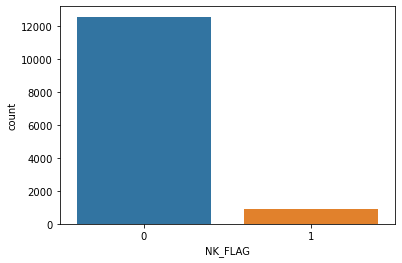

In [78]:
# Görüldüğü gibi şu an datamız imbalance halde.
chck = pd.DataFrame()
chck['NK_FLAG'] = y
sns.countplot(chck['NK_FLAG'])

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 58 columns):
 #   Column                            Non-Null Count  Dtype   
---  ------                            --------------  -----   
 0   TUKETIM_M1                        15000 non-null  float64 
 1   TUKETIM_M2                        15000 non-null  float64 
 2   TUKETIM_M3                        15000 non-null  float64 
 3   TUKETIM_M4                        15000 non-null  float64 
 4   TUKETIM_M5                        15000 non-null  float64 
 5   TUKETIM_M6                        15000 non-null  float64 
 6   TUKETIM_M7                        15000 non-null  float64 
 7   TUKETIM_M8                        15000 non-null  float64 
 8   TUKETIM_M9                        15000 non-null  float64 
 9   TUKETIM_M10                       15000 non-null  float64 
 10  TUKETIM_M11                       15000 non-null  float64 
 11  TUKETIM_M12                       15000 non-null  floa

SMOTE işlemi yapılmış veri üzerinde train ve test ayrımı yapılır.

In [80]:
# Oversampling işlemleri
oversample = SMOTE(random_state=5)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify=y,random_state=5)
X_over, y_over = oversample.fit_resample(X_train, y_train)
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size = 0.3, stratify=y_over,random_state=5)

<AxesSubplot:xlabel='NK_FLAG', ylabel='count'>

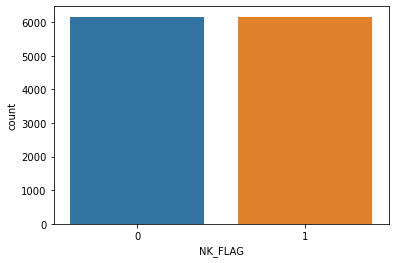

In [81]:
chck = pd.DataFrame()
chck['NK_FLAG'] = y_train
sns.countplot(chck['NK_FLAG'])

## Validation Datası

Validation datası için yukarıdaki işlemlerin aynısı gerçekleştirilecektir.

In [82]:
cat_cols = ["TESISAT_TIPI","SAYAC_OLCUM_TURU", "SAYAC_FAZ_N", "SAYAC_YAPIM_YILI"]
for col in cat_cols:
    df_val[col] = df_val[col].astype('object')

columns_to_encode = []
for col in df_val.columns:
    if df_val[col].dtype == 'object':
        columns_to_encode.append(col)
# Train datamız için oluşturduğumuz ohe objesini uyguluyoruz. (sadece transform)
df2_temp = pd.DataFrame(ohe.transform(df_val[columns_to_encode]).toarray(), columns=cat_val)

In [83]:
num_columns = cl[:54] 
df_val_num = pd.DataFrame(df_val, columns=num_columns) # Validation datamızın numeric verileri
# Bunu yapmadan concat işlemi yapınca indexler çakıştığı için çok fazla NoNe değer alıyorum.
df_val_num.reset_index(drop=True, inplace=True)

dfval = pd.concat([df_val_num,df2_temp], axis=1)
dfval.head() # Validation datamız hazır.
# En önemlisi validatino datamızın kolon sayısı ile train datamızın kolon sayısı aynı. Hatayı çözdük.
# handle_unknown=ignore sayesinde.

,TUKETIM_M1,TUKETIM_M2,TUKETIM_M3,TUKETIM_M4,TUKETIM_M5,TUKETIM_M6,TUKETIM_M7,TUKETIM_M8,TUKETIM_M9,TUKETIM_M10,...,TESISAT_TIPI_Mesken,TESISAT_TIPI_Ticarethane-Sanayi,SAYAC_OLCUM_TURU_Aktif,SAYAC_OLCUM_TURU_Kombi,SAYAC_OLCUM_TURU_UNDEFINED,SAYAC_FAZ_N_Monofaze,SAYAC_FAZ_N_Trifaze,SAYAC_FAZ_N_UNDEFINED,SAYAC_YAPIM_YILI_2015 ve sonrası,SAYAC_YAPIM_YILI_2015 Öncesi
0,1.840710,6.973914,6.886435,6.953594,7.828738,8.855208,9.793065,10.080064,10.058266,9.817511,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,15.492539,15.528413,17.166311,17.346534,15.945604,15.879279,17.677011,17.794138,16.578622,15.798370,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,4.078471,15.536003,16.073328,15.375825,13.476673,13.824134,14.723038,14.924409,14.104833,14.851575,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,5.536371,14.923425,15.415291,14.937746,13.353902,13.975876,15.642824,18.646661,16.237650,14.710345,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,11.138281,18.698323,17.709121,15.976201,15.894130,15.211927,14.614122,13.770456,13.774983,14.177704,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


**df_train --> Train Datamız**  
**dfval --> Validation Datamız**

In [84]:
# Validation datası için ayırma işlemi
features = []
for col in dfval.columns:
    if col != 'NK_FLAG':
        features.append(col)

target = 'NK_FLAG'

X_val = dfval[features]
y_val = dfval[target]

In [85]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_val = sc.fit_transform(X_val)

# MODELLEME

Bu kısımda 5 farklı model denenmiştir. Modellerden beklenen, genel accuracy skorunun yüksekliğinden ziyade fraud yakalayabilme gücüdür. O yüzden en iyi F1-Skoru aranacaktır ve confussion matrix üzerinde fraud yakalama sayıları analiz edilecektir.

## RandomForest

98.03067600833175

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      2640
           1       0.97      0.99      0.98      2641

    accuracy                           0.98      5281
   macro avg       0.98      0.98      0.98      5281
weighted avg       0.98      0.98      0.98      5281



<AxesSubplot:>

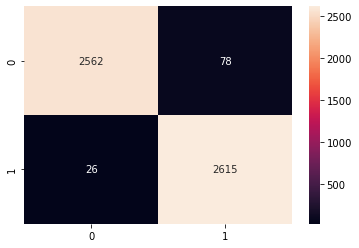

In [86]:
# Modelin eğitilmesi ve sonuçları
rfc = RandomForestClassifier(random_state=5)
rfc.fit(X_train, y_train)

preds = rfc.predict(X_test)

score_rfc = rfc.score(X_test, y_test)
print(score_rfc*100)
print()
print(classification_report(y_test, preds))

cm = confusion_matrix(y_test, preds)
sns
sns.heatmap(cm, annot=True, fmt='g')

88.2

              precision    recall  f1-score   support

           0       0.99      0.88      0.93      1407
           1       0.33      0.89      0.48        93

    accuracy                           0.88      1500
   macro avg       0.66      0.89      0.71      1500
weighted avg       0.95      0.88      0.91      1500



<AxesSubplot:>

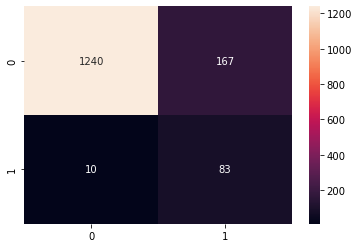

In [87]:
# Önceden eğittiğimiz modele validation datamızı veriyoruz.
preds = rfc.predict(X_val)
score = rfc.score(X_val, y_val)
print(score*100)
print()
print(classification_report(y_val, preds))

cm = confusion_matrix(y_val, preds)
sns
sns.heatmap(cm, annot=True,fmt='g')

### Hyperparameter Optimization

In [88]:
"""from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [100, 300, 500, 700, 900]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [2, 3, 5, 8, 10]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 7, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4, 6, 8]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=1, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)"""

"from sklearn.model_selection import RandomizedSearchCV\n# Number of trees in random forest\nn_estimators = [100, 300, 500, 700, 900]\n\n# Number of features to consider at every split\nmax_features = ['auto', 'sqrt']\n# Maximum number of levels in tree\nmax_depth = [2, 3, 5, 8, 10]\nmax_depth.append(None)\n# Minimum number of samples required to split a node\nmin_samples_split = [2, 5, 7, 10]\n# Minimum number of samples required at each leaf node\nmin_samples_leaf = [1, 2, 4, 6, 8]\n# Method of selecting samples for training each tree\nbootstrap = [True, False]\n# Create the random grid\nrandom_grid = {'n_estimators': n_estimators,\n               'max_features': max_features,\n               'max_depth': max_depth,\n               'min_samples_split': min_samples_split,\n               'min_samples_leaf': min_samples_leaf,\n               'bootstrap': bootstrap}\nprint(random_grid)\n\n# Use the random grid to search for best hyperparameters\n# First create the base model to tune\nrf

In [89]:
#rf_random.best_params_

98.25790569967809

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      2640
           1       0.98      0.99      0.98      2641

    accuracy                           0.98      5281
   macro avg       0.98      0.98      0.98      5281
weighted avg       0.98      0.98      0.98      5281



<AxesSubplot:>

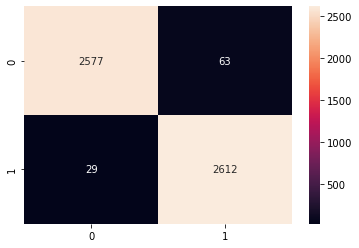

In [90]:
# Modelin eğitilmesi ve sonuçları
rfc_new = RandomForestClassifier(n_estimators=900,min_samples_split =10,min_samples_leaf=1,
                                 max_features='sqrt',max_depth=None,bootstrap=False,random_state=5)
rfc_new.fit(X_train, y_train)

preds = rfc_new.predict(X_test)

score = rfc_new.score(X_test, y_test)
print(score*100)
print()
print(classification_report(y_test, preds))

cm = confusion_matrix(y_test, preds)
sns
sns.heatmap(cm, annot=True,fmt='g')

### Validation Dataseti Sonuçları

86.53333333333333

              precision    recall  f1-score   support

           0       0.99      0.86      0.92      1407
           1       0.30      0.89      0.45        93

    accuracy                           0.87      1500
   macro avg       0.65      0.88      0.69      1500
weighted avg       0.95      0.87      0.89      1500



<AxesSubplot:>

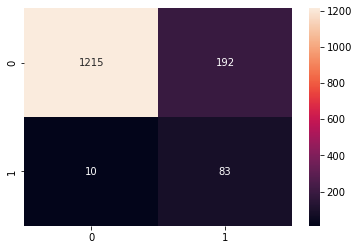

In [91]:
# Önceden eğittiğimiz modele validation datamızı veriyoruz.
preds = rfc_new.predict(X_val)
score_rfc_val = rfc_new.score(X_val, y_val)
print(score_rfc_val*100)
print()
print(classification_report(y_val, preds))

cm = confusion_matrix(y_val, preds)
sns
sns.heatmap(cm, annot=True,fmt='g')

### Threshold Değerinin Değiştirilmesi

In [92]:
threshold = 0.71
predictions = (rfc_new.predict_proba(X_val)[:, 1] >= threshold).astype(int)

In [93]:
print('Valuation for test data only:')
print(classification_report(y_val, preds))
print("----------------------------------------------------------------------")
print('Valuation for test data only  (new_threshold):')
print(classification_report(y_val, predictions))

Valuation for test data only:
              precision    recall  f1-score   support

           0       0.99      0.86      0.92      1407
           1       0.30      0.89      0.45        93

    accuracy                           0.87      1500
   macro avg       0.65      0.88      0.69      1500
weighted avg       0.95      0.87      0.89      1500

----------------------------------------------------------------------
Valuation for test data only  (new_threshold):
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1407
           1       0.70      0.59      0.64        93

    accuracy                           0.96      1500
   macro avg       0.83      0.79      0.81      1500
weighted avg       0.96      0.96      0.96      1500



## SVC

91.40314334406362

              precision    recall  f1-score   support

           0       0.92      0.90      0.91      2640
           1       0.91      0.92      0.91      2641

    accuracy                           0.91      5281
   macro avg       0.91      0.91      0.91      5281
weighted avg       0.91      0.91      0.91      5281



<AxesSubplot:>

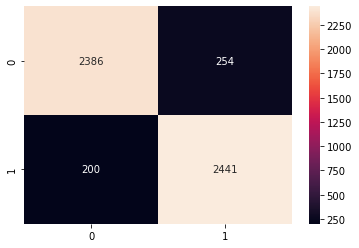

In [94]:
from sklearn.svm import SVC
# Modelin eğitilmesi ve sonuçları
svc = SVC(C=0.1, kernel='linear',probability=True, random_state=5)
svc.fit(X_train, y_train)

preds = svc.predict(X_test)

score_svc = svc.score(X_test, y_test)
print(score_svc*100)
print()
print(classification_report(y_test, preds))

cm = confusion_matrix(y_test, preds)
sns
sns.heatmap(cm, annot=True,fmt='g')

89.60000000000001

              precision    recall  f1-score   support

           0       0.99      0.90      0.94      1407
           1       0.36      0.89      0.52        93

    accuracy                           0.90      1500
   macro avg       0.68      0.89      0.73      1500
weighted avg       0.95      0.90      0.92      1500



<AxesSubplot:>

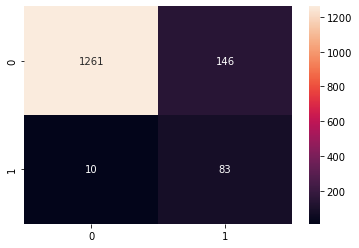

In [95]:
# Önceden eğittiğimiz modele validation datamızı veriyoruz.
preds_svc = svc.predict(X_val)
score_svc_val = svc.score(X_val, y_val)
print(score_svc_val*100)
print()
print(classification_report(y_val, preds_svc))

cm = confusion_matrix(y_val, preds_svc)
sns
sns.heatmap(cm, annot=True,fmt='g')

In [96]:
threshold = 0.92
predictions_svc = (svc.predict_proba(X_val)[:, 1] >= threshold).astype(int)

<AxesSubplot:>

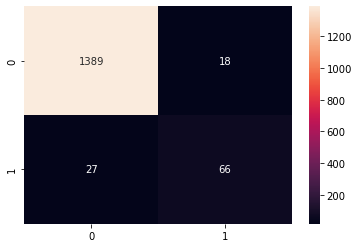

In [97]:
cm = confusion_matrix(y_val, predictions_svc)
sns
sns.heatmap(cm, annot=True, fmt='g')

In [98]:
print('Valuation for test data only:')
print(classification_report(y_val, preds_svc))
print("----------------------------------------------------------------------")
print('Valuation for test data only  (new_threshold):')
print(classification_report(y_val, predictions_svc))

Valuation for test data only:
              precision    recall  f1-score   support

           0       0.99      0.90      0.94      1407
           1       0.36      0.89      0.52        93

    accuracy                           0.90      1500
   macro avg       0.68      0.89      0.73      1500
weighted avg       0.95      0.90      0.92      1500

----------------------------------------------------------------------
Valuation for test data only  (new_threshold):
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1407
           1       0.79      0.71      0.75        93

    accuracy                           0.97      1500
   macro avg       0.88      0.85      0.86      1500
weighted avg       0.97      0.97      0.97      1500



### Hyperparameter Optimization

In [99]:
"""from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
C = [0.1,1, 10, 100]
kernel = ["linear", "poly", "rbf"]
gamma = [1,0.1,0.01,0.001]
svc_model_params = {'C': C, "kernel": kernel, "gamma":gamma}
print(svc_model_params)

# Use the random grid to search for best hyperparameters
# First create the base model to tune
svc_2 = SVC()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
svc_random = RandomizedSearchCV(estimator = svc_2, param_distributions = svc_model_params, n_iter = 100, cv = 3, verbose=2, random_state=1, n_jobs = -1)
# Fit the random search model
svc_random.fit(X_train, y_train)"""

'from sklearn.model_selection import RandomizedSearchCV\n# Number of trees in random forest\nC = [0.1,1, 10, 100]\nkernel = ["linear", "poly", "rbf"]\ngamma = [1,0.1,0.01,0.001]\nsvc_model_params = {\'C\': C, "kernel": kernel, "gamma":gamma}\nprint(svc_model_params)\n\n# Use the random grid to search for best hyperparameters\n# First create the base model to tune\nsvc_2 = SVC()\n# Random search of parameters, using 3 fold cross validation, \n# search across 100 different combinations, and use all available cores\nsvc_random = RandomizedSearchCV(estimator = svc_2, param_distributions = svc_model_params, n_iter = 100, cv = 3, verbose=2, random_state=1, n_jobs = -1)\n# Fit the random search model\nsvc_random.fit(X_train, y_train)'

In [100]:
#svc_random.best_params_

98.82597992804392

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      2640
           1       0.98      0.99      0.99      2641

    accuracy                           0.99      5281
   macro avg       0.99      0.99      0.99      5281
weighted avg       0.99      0.99      0.99      5281



<AxesSubplot:>

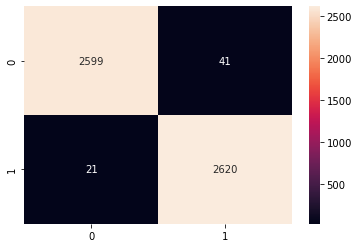

In [101]:
from sklearn.svm import SVC
# Modelin eğitilmesi ve sonuçları
svc_new = SVC(kernel="rbf",gamma=0.1,C=10,probability=True,random_state=5)
svc_new.fit(X_train, y_train)

preds = svc_new.predict(X_test)

score = svc_new.score(X_test, y_test)
print(score*100)
print()
print(classification_report(y_test, preds))

cm = confusion_matrix(y_test, preds)
sns
sns.heatmap(cm, annot=True,fmt='g')

### Validation Dataseti Sonuçları

95.13333333333334

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1407
           1       0.71      0.37      0.48        93

    accuracy                           0.95      1500
   macro avg       0.83      0.68      0.73      1500
weighted avg       0.94      0.95      0.94      1500



<AxesSubplot:>

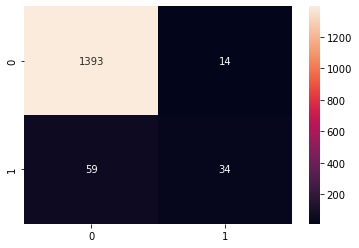

In [102]:
# Önceden eğittiğimiz modele validation datamızı veriyoruz.
preds = svc_new.predict(X_val)
score = svc_new.score(X_val, y_val)
print(score*100)
print()
print(classification_report(y_val, preds))

cm = confusion_matrix(y_val, preds)
sns
sns.heatmap(cm, annot=True,fmt='g')

### Threshold Değerinin Değiştirilmesi

In [103]:
threshold = 0.1
predictions = (svc_new.predict_proba(X_val)[:, 1] >= threshold).astype(int)

In [104]:
print('Valuation for test data only:')
print(classification_report(y_val, preds))
print("----------------------------------------------------------------------")
print('Valuation for test data only  (new_threshold):')
print(classification_report(y_val, predictions))

Valuation for test data only:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1407
           1       0.71      0.37      0.48        93

    accuracy                           0.95      1500
   macro avg       0.83      0.68      0.73      1500
weighted avg       0.94      0.95      0.94      1500

----------------------------------------------------------------------
Valuation for test data only  (new_threshold):
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      1407
           1       0.62      0.54      0.58        93

    accuracy                           0.95      1500
   macro avg       0.80      0.76      0.78      1500
weighted avg       0.95      0.95      0.95      1500



## MLPClassifier

98.06854762355614

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      2640
           1       0.97      0.99      0.98      2641

    accuracy                           0.98      5281
   macro avg       0.98      0.98      0.98      5281
weighted avg       0.98      0.98      0.98      5281



<AxesSubplot:>

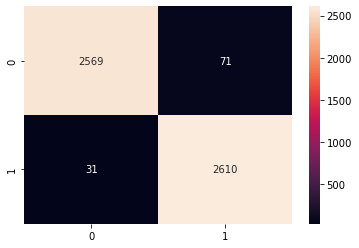

In [105]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(random_state=5)
mlp.fit(X_train, y_train)

preds = mlp.predict(X_test)

score_mlp = mlp.score(X_test, y_test)
print(score_mlp*100)
print()
print(classification_report(y_test, preds))

cm = confusion_matrix(y_test, preds)
sns
sns.heatmap(cm, annot=True,fmt='g')

95.8

              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1407
           1       0.65      0.71      0.68        93

    accuracy                           0.96      1500
   macro avg       0.81      0.84      0.83      1500
weighted avg       0.96      0.96      0.96      1500



<AxesSubplot:>

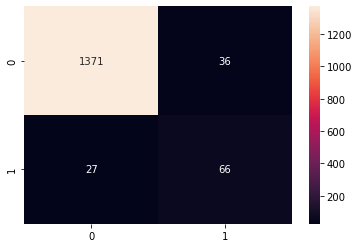

In [106]:
# Önceden eğittiğimiz modele validation datamızı veriyoruz.
preds = mlp.predict(X_val)
score = mlp.score(X_val, y_val)
print(score*100)
print()
print(classification_report(y_val, preds))

cm = confusion_matrix(y_val, preds)
sns
sns.heatmap(cm, annot=True,fmt='g')

### Hyperparameter Optimization

In [107]:
"""from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
alpha = [0.1,0.01, 0.02, 0.005,0.0001]
hidden_layer_sizes = [(10,10,10), (100,100,100),(100,100), (3,5), (5,3)]
solver = ["lbfgs", "adam", "sgd"]
activation = ["relu", "logistic"]
learning_rate = ['constant','adaptive']
mlp_model_params = {'alpha': alpha, "hidden_layer_sizes": hidden_layer_sizes,
                    "solver":solver,"activation":activation, "learning_rate":learning_rate}

print(mlp_model_params)

# Use the random grid to search for best hyperparameters
# First create the base model to tune
mlp2 = MLPClassifier(max_iter=100)
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
mlpc = RandomizedSearchCV(estimator = mlp2, param_distributions = mlp_model_params, n_iter = 100, cv = 3, verbose=2, random_state=1, n_jobs = -1)
# Fit the random search model
mlpc.fit(X_train, y_train)"""

'from sklearn.model_selection import RandomizedSearchCV\n# Number of trees in random forest\nalpha = [0.1,0.01, 0.02, 0.005,0.0001]\nhidden_layer_sizes = [(10,10,10), (100,100,100),(100,100), (3,5), (5,3)]\nsolver = ["lbfgs", "adam", "sgd"]\nactivation = ["relu", "logistic"]\nlearning_rate = [\'constant\',\'adaptive\']\nmlp_model_params = {\'alpha\': alpha, "hidden_layer_sizes": hidden_layer_sizes,\n                    "solver":solver,"activation":activation, "learning_rate":learning_rate}\n\nprint(mlp_model_params)\n\n# Use the random grid to search for best hyperparameters\n# First create the base model to tune\nmlp2 = MLPClassifier(max_iter=100)\n# Random search of parameters, using 3 fold cross validation, \n# search across 100 different combinations, and use all available cores\nmlpc = RandomizedSearchCV(estimator = mlp2, param_distributions = mlp_model_params, n_iter = 100, cv = 3, verbose=2, random_state=1, n_jobs = -1)\n# Fit the random search model\nmlpc.fit(X_train, y_train)'

In [108]:
#mlpc.best_params_

98.63662185192197

              precision    recall  f1-score   support

           0       1.00      0.97      0.99      2640
           1       0.97      1.00      0.99      2641

    accuracy                           0.99      5281
   macro avg       0.99      0.99      0.99      5281
weighted avg       0.99      0.99      0.99      5281



<AxesSubplot:>

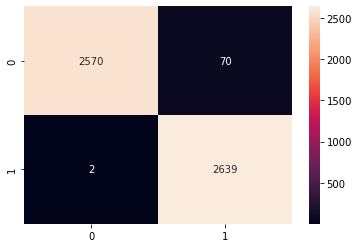

In [109]:
from sklearn.neural_network import MLPClassifier

mlp_new = MLPClassifier(solver="adam",learning_rate="adaptive",
                        hidden_layer_sizes = (100,100,100),alpha=0.005,
                        activation="relu",random_state=5)
mlp_new.fit(X_train, y_train)

preds = mlp_new.predict(X_test)

score = mlp_new.score(X_test, y_test)
print(score*100)
print()
print(classification_report(y_test, preds))

cm = confusion_matrix(y_test, preds)
sns
sns.heatmap(cm, annot=True,fmt='g')

### Validation Dataseti Sonuçları

95.93333333333334

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1407
           1       0.66      0.72      0.69        93

    accuracy                           0.96      1500
   macro avg       0.82      0.85      0.83      1500
weighted avg       0.96      0.96      0.96      1500



<AxesSubplot:>

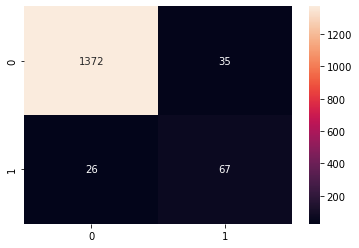

In [110]:
# Önceden eğittiğimiz modele validation datamızı veriyoruz.
preds = mlp_new.predict(X_val)
score_mlp_val = mlp_new.score(X_val, y_val)
print(score_mlp_val*100)
print()
print(classification_report(y_val, preds))

cm = confusion_matrix(y_val, preds)
sns
sns.heatmap(cm, annot=True,fmt='g')

### Threshold Değerinin Değiştirilmesi

In [111]:
threshold = 0.81
predictions = (mlp_new.predict_proba(X_val)[:, 1] >= threshold).astype(int)

In [112]:
print('Valuation for test data only:')
print(classification_report(y_val, preds))
print("----------------------------------------------------------------------")
print('Valuation for test data only  (new_threshold):')
print(classification_report(y_val, predictions))

Valuation for test data only:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1407
           1       0.66      0.72      0.69        93

    accuracy                           0.96      1500
   macro avg       0.82      0.85      0.83      1500
weighted avg       0.96      0.96      0.96      1500

----------------------------------------------------------------------
Valuation for test data only  (new_threshold):
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1407
           1       0.68      0.70      0.69        93

    accuracy                           0.96      1500
   macro avg       0.83      0.84      0.83      1500
weighted avg       0.96      0.96      0.96      1500



## CatBoostClassifier

Learning rate set to 0.030105
0:	learn: 0.6513038	total: 172ms	remaining: 2m 51s
1:	learn: 0.6120917	total: 185ms	remaining: 1m 32s
2:	learn: 0.5784478	total: 201ms	remaining: 1m 6s
3:	learn: 0.5506401	total: 214ms	remaining: 53.2s
4:	learn: 0.5278229	total: 227ms	remaining: 45.1s
5:	learn: 0.5054745	total: 239ms	remaining: 39.6s
6:	learn: 0.4788319	total: 253ms	remaining: 35.9s
7:	learn: 0.4566083	total: 266ms	remaining: 33s
8:	learn: 0.4367853	total: 279ms	remaining: 30.8s
9:	learn: 0.4187320	total: 291ms	remaining: 28.8s
10:	learn: 0.4013694	total: 304ms	remaining: 27.3s
11:	learn: 0.3885186	total: 316ms	remaining: 26.1s
12:	learn: 0.3743586	total: 330ms	remaining: 25.1s
13:	learn: 0.3606871	total: 344ms	remaining: 24.2s
14:	learn: 0.3482412	total: 356ms	remaining: 23.4s
15:	learn: 0.3361017	total: 370ms	remaining: 22.8s
16:	learn: 0.3260954	total: 384ms	remaining: 22.2s
17:	learn: 0.3153947	total: 399ms	remaining: 21.8s
18:	learn: 0.3077375	total: 412ms	remaining: 21.3s
19:	learn: 

<AxesSubplot:>

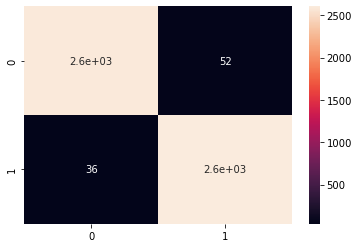

In [113]:
from catboost import CatBoostClassifier

cat_model = CatBoostClassifier(random_state=5).fit(X_train,y_train)

preds = cat_model.predict(X_test)

score_cat = cat_model.score(X_test, y_test)
print(score_cat*100)
print()
print(classification_report(y_test, preds))

cm = confusion_matrix(y_test, preds)
sns
sns.heatmap(cm, annot=True)

### Validation Dataseti Sonuçları

81.39999999999999

              precision    recall  f1-score   support

           0       1.00      0.80      0.89      1407
           1       0.25      0.98      0.39        93

    accuracy                           0.81      1500
   macro avg       0.62      0.89      0.64      1500
weighted avg       0.95      0.81      0.86      1500



<AxesSubplot:>

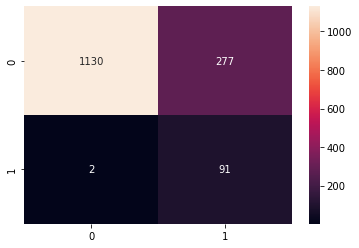

In [114]:
# Önceden eğittiğimiz modele validation datamızı veriyoruz.
preds = cat_model.predict(X_val)
score_cat_val = cat_model.score(X_val, y_val)
print(score_cat_val*100)
print()
print(classification_report(y_val, preds))

cm = confusion_matrix(y_val, preds)
sns
sns.heatmap(cm, annot=True,fmt='g')

### Threshold Değerinin Değiştirilmesi

In [115]:
threshold = 0.9
predictions = (cat_model.predict_proba(X_val)[:, 1] >= threshold).astype(int)

In [116]:
print('Valuation for test data only:')
print(classification_report(y_val, preds))
print("----------------------------------------------------------------------")
print('Valuation for test data only  (new_threshold):')
print(classification_report(y_val, predictions))

Valuation for test data only:
              precision    recall  f1-score   support

           0       1.00      0.80      0.89      1407
           1       0.25      0.98      0.39        93

    accuracy                           0.81      1500
   macro avg       0.62      0.89      0.64      1500
weighted avg       0.95      0.81      0.86      1500

----------------------------------------------------------------------
Valuation for test data only  (new_threshold):
              precision    recall  f1-score   support

           0       0.99      0.94      0.96      1407
           1       0.46      0.81      0.59        93

    accuracy                           0.93      1500
   macro avg       0.72      0.87      0.77      1500
weighted avg       0.95      0.93      0.94      1500



## Logistic Regression(En İyi F1 Skoru)

91.34633592122704
              precision    recall  f1-score   support

           0       0.92      0.91      0.91      2640
           1       0.91      0.92      0.91      2641

    accuracy                           0.91      5281
   macro avg       0.91      0.91      0.91      5281
weighted avg       0.91      0.91      0.91      5281



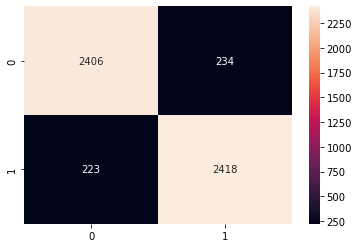

In [117]:
lr = LogisticRegression(penalty = 'l2', C = 1000,random_state=5)

lr.fit(X_train, y_train)

preds = lr.predict(X_test)
score_logreg = lr.score(X_test, y_test)

print(score_logreg*100)

print(classification_report(y_test, preds))

cm = confusion_matrix(y_test, preds)
sns.heatmap(cm, annot = True, fmt='g')
plt.show()

### Validation Dataseti Sonuçları

90.53333333333333

              precision    recall  f1-score   support

           0       0.99      0.91      0.95      1407
           1       0.39      0.89      0.54        93

    accuracy                           0.91      1500
   macro avg       0.69      0.90      0.74      1500
weighted avg       0.95      0.91      0.92      1500



<AxesSubplot:>

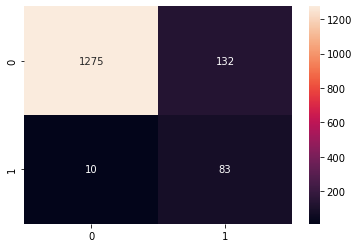

In [118]:
preds_lr = lr.predict(X_val)
score_lr_val = lr.score(X_val, y_val)
print(score_lr_val*100)
print()
print(classification_report(y_val, preds_lr))

cm = confusion_matrix(y_val, preds_lr)
sns
sns.heatmap(cm, annot=True, fmt='g')

### Threshold Değerinin Değiştirilmesi

In [119]:
threshold = 0.90
predictions_lr = (lr.predict_proba(X_val)[:, 1] >= threshold).astype(int)

Valuation for test data only:
              precision    recall  f1-score   support

           0       0.99      0.91      0.95      1407
           1       0.39      0.89      0.54        93

    accuracy                           0.91      1500
   macro avg       0.69      0.90      0.74      1500
weighted avg       0.95      0.91      0.92      1500

----------------------------------------------------------------------
Valuation for test data only  (new_threshold):
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1407
           1       0.76      0.75      0.76        93

    accuracy                           0.97      1500
   macro avg       0.87      0.87      0.87      1500
weighted avg       0.97      0.97      0.97      1500



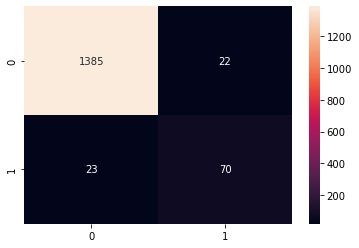

In [120]:
cm = confusion_matrix(y_val, predictions_lr)
sns
sns.heatmap(cm, annot=True, fmt='g')

print('Valuation for test data only:')
print(classification_report(y_val, preds_lr))
print("----------------------------------------------------------------------")
print('Valuation for test data only  (new_threshold):')
print(classification_report(y_val, predictions_lr))

## Naive Bayes

76.65214921416398

              precision    recall  f1-score   support

           0       0.76      0.78      0.77      2640
           1       0.77      0.76      0.76      2641

    accuracy                           0.77      5281
   macro avg       0.77      0.77      0.77      5281
weighted avg       0.77      0.77      0.77      5281



<AxesSubplot:>

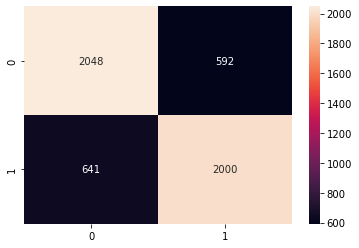

In [121]:
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB().fit(X_train, y_train)

preds = bnb.predict(X_test)

score_bnb = bnb.score(X_test, y_test)
print(score_bnb*100)
print()
print(classification_report(y_test, preds))

cm = confusion_matrix(y_test, preds)
sns
sns.heatmap(cm, annot=True,fmt='g')

### Validation Dataseti Sonuçları

76.13333333333333

              precision    recall  f1-score   support

           0       0.98      0.76      0.86      1407
           1       0.18      0.77      0.29        93

    accuracy                           0.76      1500
   macro avg       0.58      0.77      0.57      1500
weighted avg       0.93      0.76      0.82      1500



<AxesSubplot:>

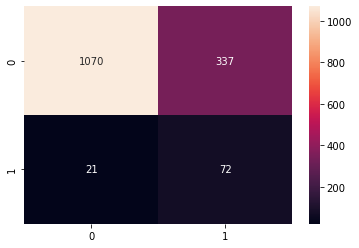

In [122]:
preds = bnb.predict(X_val)
score_bnb_val = bnb.score(X_val, y_val)
print(score_bnb_val*100)
print()
print(classification_report(y_val, preds))

cm = confusion_matrix(y_val, preds)
sns
sns.heatmap(cm, annot=True, fmt='g')

## ROC Curve

ROC Curve, dengesiz veri setlerinin bulunduğu durumlarda, makine öğrenmesi algoritmalarının performansını değerlendirmek için kullanılan ölçümlerden biridir ve modelin tahmininde ne kadar iyi olduğunu açıklar.
- ROC farklı sınıflar için bir olasılık eğrisidir. Tipik bir ROC eğrisinde X ekseninde Yanlış Pozitif Oran (FPR) ve Y ekseninde Gerçek Pozitif Orana (TPR) vardır.
- Eğri altındaki alan (AUC) model becerisinin başka bir deyişle model performansının bir özeti olarak kabul edilebilir.
- Genellikle, başarılı modeller grafiğin sol üst kısmına eğilen eğriler ile temsil edilir.

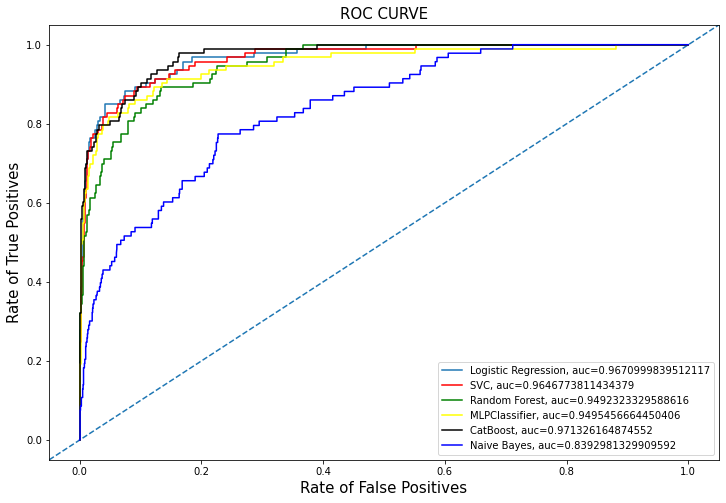

In [123]:
predictions_lr_roc = lr.predict_proba(X_val)[:, 1]
predictions_svc_roc = svc.predict_proba(X_val)[:, 1]
predictions_rfc = rfc_new.predict_proba(X_val)[:, 1]
predictions_mlp = mlp_new.predict_proba(X_val)[:, 1]
predictions_cat = cat_model.predict_proba(X_val)[:, 1]
predictions_bnb = bnb.predict_proba(X_val)[:, 1]

fpr, tpr, _ = metrics.roc_curve(y_val,  predictions_lr_roc)
fpr_svc, tpr_svc, _ = metrics.roc_curve(y_val,  predictions_svc_roc)
fpr_rfc, tpr_rfc, _ = metrics.roc_curve(y_val,  predictions_rfc)
fpr_mlp, tpr_mlp, _ = metrics.roc_curve(y_val,  predictions_mlp)
fpr_cat, tpr_cat, _ = metrics.roc_curve(y_val,  predictions_cat)
fpr_bnb, tpr_bnb, _ = metrics.roc_curve(y_val,  predictions_bnb)

auc = metrics.roc_auc_score(y_val, predictions_lr_roc)
auc_svc = metrics.roc_auc_score(y_val, predictions_svc_roc)
auc_rfc = metrics.roc_auc_score(y_val, predictions_rfc)
auc_mlp = metrics.roc_auc_score(y_val, predictions_mlp)
auc_cat = metrics.roc_auc_score(y_val, predictions_cat)
auc_bnb = metrics.roc_auc_score(y_val, predictions_bnb)

plt.figure(figsize=(12,8))
plt.axline((1, 1), slope=1, ls='--')
plt.plot(fpr, tpr, label="Logistic Regression, auc="+str(auc))
plt.plot(fpr_svc, tpr_svc, label="SVC, auc="+str(auc_svc), color='red')
plt.plot(fpr_rfc, tpr_rfc, label="Random Forest, auc="+str(auc_rfc), color='green')
plt.plot(fpr_mlp, tpr_mlp, label="MLPClassifier, auc="+str(auc_mlp), color='yellow')
plt.plot(fpr_cat, tpr_cat, label="CatBoost, auc="+str(auc_cat), color='black')
plt.plot(fpr_bnb, tpr_bnb, label="Naive Bayes, auc="+str(auc_bnb), color='blue')

plt.title("ROC CURVE", fontsize=15)
plt.xlabel("Rate of False Positives", fontsize=15)
plt.ylabel("Rate of True Positives", fontsize=15)
plt.legend(loc=4)
plt.show()

# SONUÇ

## Genel Bakış

Sonuçlarda aranan ilk özellik yüksek F1-skorudur. Genel ***accuracy*** skorlarından kısaca bahsedilecektir fakat bize fraud yakalama oranları hakkında yeterince bilgi vermediğinden üzerinde durulmayacaktır.

Modelle birlikte eğitilen ***test*** verisinde sonuçlar aşağıdaki gibidir. Bu sonuçlar ***train*** verisiyle birlikte eğitildiği için bias durumu ortaya çıkmaktadır. Bu sebeple train verisinden ayırdığımız ***validation*** verisinin sonuçları bize doğru accuracy sonuçları verecektir.

In [124]:
models = pd.DataFrame({
    'Model' : ['Random Forest', 'SVC', 'MLPClassifier', 'CatBoost', 'Logistic Regression', 'Naive Bayes'],
    'Score' : [score_rfc, score_svc, score_mlp, score_cat, score_logreg, score_bnb_val]
})


models.sort_values(by = 'Score', ascending = False)

,Model,Score
3,CatBoost,0.983336
2,MLPClassifier,0.980685
0,Random Forest,0.980307
1,SVC,0.914031
4,Logistic Regression,0.913463
5,Naive Bayes,0.761333


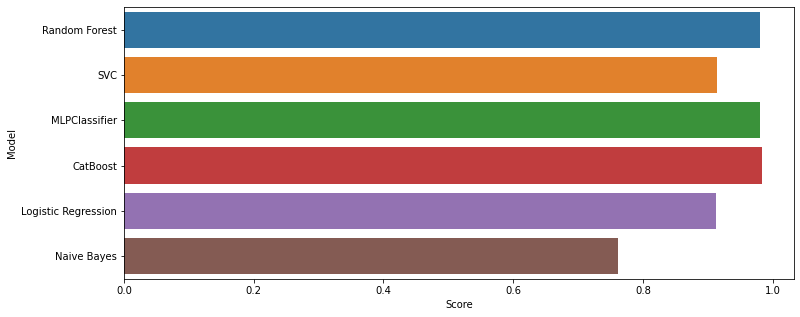

In [125]:
plt.figure(figsize = (12, 5))

sns.barplot(x = 'Score', y = 'Model', data = models)
plt.show()

Validation verisi skorları aşağıdaki gibi değişmiştir.

In [126]:
models = pd.DataFrame({
    'Model' : ['Random Forest', 'SVC', 'MLPClassifier', 'CatBoost', 'Logistic Regression', 'Naive Bayes'],
    'Score' : [score_rfc_val, score_svc_val, score_mlp_val, score_cat_val, score_lr_val, score_bnb_val]
})


models.sort_values(by = 'Score', ascending = False)

,Model,Score
2,MLPClassifier,0.959333
4,Logistic Regression,0.905333
1,SVC,0.896000
0,Random Forest,0.865333
3,CatBoost,0.814000
5,Naive Bayes,0.761333


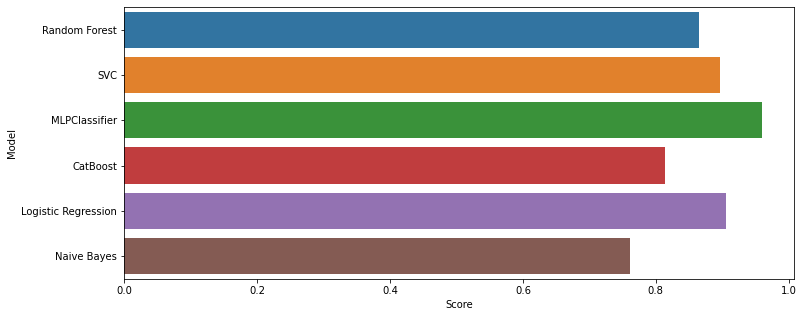

In [127]:
plt.figure(figsize = (12, 5))

sns.barplot(x = 'Score', y = 'Model', data = models)
plt.show()

## F1-Skoru

### En İyi F1-Skoru

Modellerden elde ettiğimiz en iyi F1-Skoru Logistic Regression modeline aittir. 
- F1-Skoru:
    * 0 tahmin etme oranı: 0.98
    * 1 tahmin etme oranı: 0.76
- Bu model her 4 fraud vakasından 3'ünü yakalayabilmektedir.

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1407
           1       0.76      0.75      0.76        93

    accuracy                           0.97      1500
   macro avg       0.87      0.87      0.87      1500
weighted avg       0.97      0.97      0.97      1500



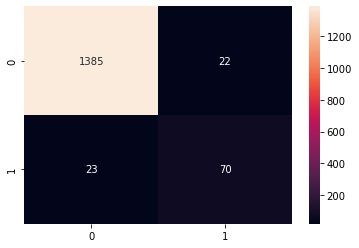

In [128]:
cm = confusion_matrix(y_val, predictions_lr)
sns
sns.heatmap(cm, annot=True, fmt='g')
print(classification_report(y_val, predictions_lr))

### En Az Hata Yapan Model

- Eğitilen modeller arasında en az hata yapan model SVC modelidir.
    * Fraud olmayan ama fraud tahmin ettiği vaka sayısı: 18
    * Fraud olan ama fraud değil olarak tahmin ettiği vaka sayısı: 27
- Logistic Regression ile benzer skorlara sahip olsalar da hata yapma oranını oldukça azalttığı için burada yer verilmiştir.

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1407
           1       0.79      0.71      0.75        93

    accuracy                           0.97      1500
   macro avg       0.88      0.85      0.86      1500
weighted avg       0.97      0.97      0.97      1500



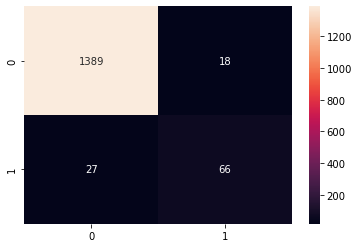

In [129]:
cm = confusion_matrix(y_val, predictions_svc)
sns
sns.heatmap(cm, annot=True, fmt='g')
print(classification_report(y_val, predictions_svc))